# Импорт библиотек

In [1]:

import dill
import os
import time
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from datetime import datetime

# Настройки

In [2]:
sns.set() # эта функция меняет глобальные переменные: все последующие графики отрисовываются в том же стиле.
plt.rc('figure', figsize=(18, 6)) # устанавливаем размеры графиков по умолчанию
pd.set_option('display.max_columns', 100) # настрим показ максимального количества столбцов
warnings.filterwarnings('ignore') # никогда не печатать соответствующие предупреждения

# Загрузка данных

In [3]:
#Загрука ga_hits
path = os.path.expanduser('~/Last_work/')

start = time.time()
with open(f'data/ga_hits.pkl', 'rb') as file:
    ga_hits = dill.load(file)
elapsed_time = time.time() - start
print(elapsed_time)

30.230268001556396


In [4]:
ga_hits.shape

(15726470, 11)

In [5]:
#Загрука ga_sessions
start = time.time()
with open(f'data/ga_sessions.pkl', 'rb') as file:
    ga_sessions = dill.load(file)
elapsed_time = time.time() - start
print(elapsed_time)

3.5886809825897217


In [6]:
ga_sessions.shape

(1860042, 18)

# Обзор таблиц

In [7]:
ga_hits.head(10)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None
5,6466333295973247896.1640246168.1640246168,2021-12-23,704194.0,41,event,NaN,sberauto.com/cars?utm_source_initial=youtube&u...,quiz,quiz_show,NaN,None
6,281215510786615563.1640245516.1640245516,2021-12-23,911854.0,102,event,NaN,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,quiz_show,NaN,None
7,4024492994895054107.1640269084.1640269084,2021-12-23,1071804.0,85,event,NaN,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,NaN,None
8,555009234841130092.1640256620.1640256620,2021-12-23,1013899.0,101,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show,NaN,None
9,2692901778487480807.1640206845.1640206845,2021-12-23,0.0,1,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,view_card,NaN,None


In [8]:
ga_sessions.head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Apple,NaN,375x812,Safari,Russia,Saint Petersburg
6,9055455318486370642.1640843788.1640843788,2108387490.1640843602,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg
8,9055462349345527315.1638536723.1638536723,2108389127.1638536723,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Moscow
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Samsung,NaN,412x915,Chrome,Russia,Moscow


Период данных

In [9]:
print(f'В таблицу ga_hits данные с {ga_hits.hit_date.min()} по  {ga_hits.hit_date.max()}') 

В таблицу ga_hits данные с 2021-05-19 по  2021-12-31


In [10]:
print(f'В таблицу ga_sessions данные с {ga_sessions.visit_date.min()} по  {ga_sessions.visit_date.max()}') 

В таблицу ga_sessions данные с 2021-05-19 по  2021-12-31


Проверка на дубли

In [11]:
ga_hits.duplicated().sum()

0

In [12]:
ga_sessions.duplicated().sum()

0

Типы данных

In [13]:
ga_hits.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ GB


In [14]:
ga_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


Пропуски

In [15]:
ga_hits.isna().sum()

session_id               0
hit_date                 0
hit_time           9160322
hit_number               0
hit_type                 0
hit_referer        6274804
hit_page_path            0
event_category           0
event_action             0
event_label        3760184
event_value       15726470
dtype: int64

In [16]:
ga_sessions.isna().sum()

session_id                        0
client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                       97
utm_medium                        0
utm_campaign                 219603
utm_adcontent                335615
utm_keyword                 1082061
device_category                   0
device_os                   1070138
device_brand                 118678
device_model                1843704
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
dtype: int64

# ga_hits, обзор

In [17]:
#Количество действий
ga_hits.event_action.value_counts()

view_card                     3558985
view_new_card                 3551009
sub_landing                   1798117
go_to_car_card                 973666
sub_view_cars_click            791515
                               ...   
click_on_android                    1
new_year_road_help_btn              1
titul_page_view                     1
show_pos_status_declined            1
survey_buy_after_sell_when          1
Name: event_action, Length: 230, dtype: int64

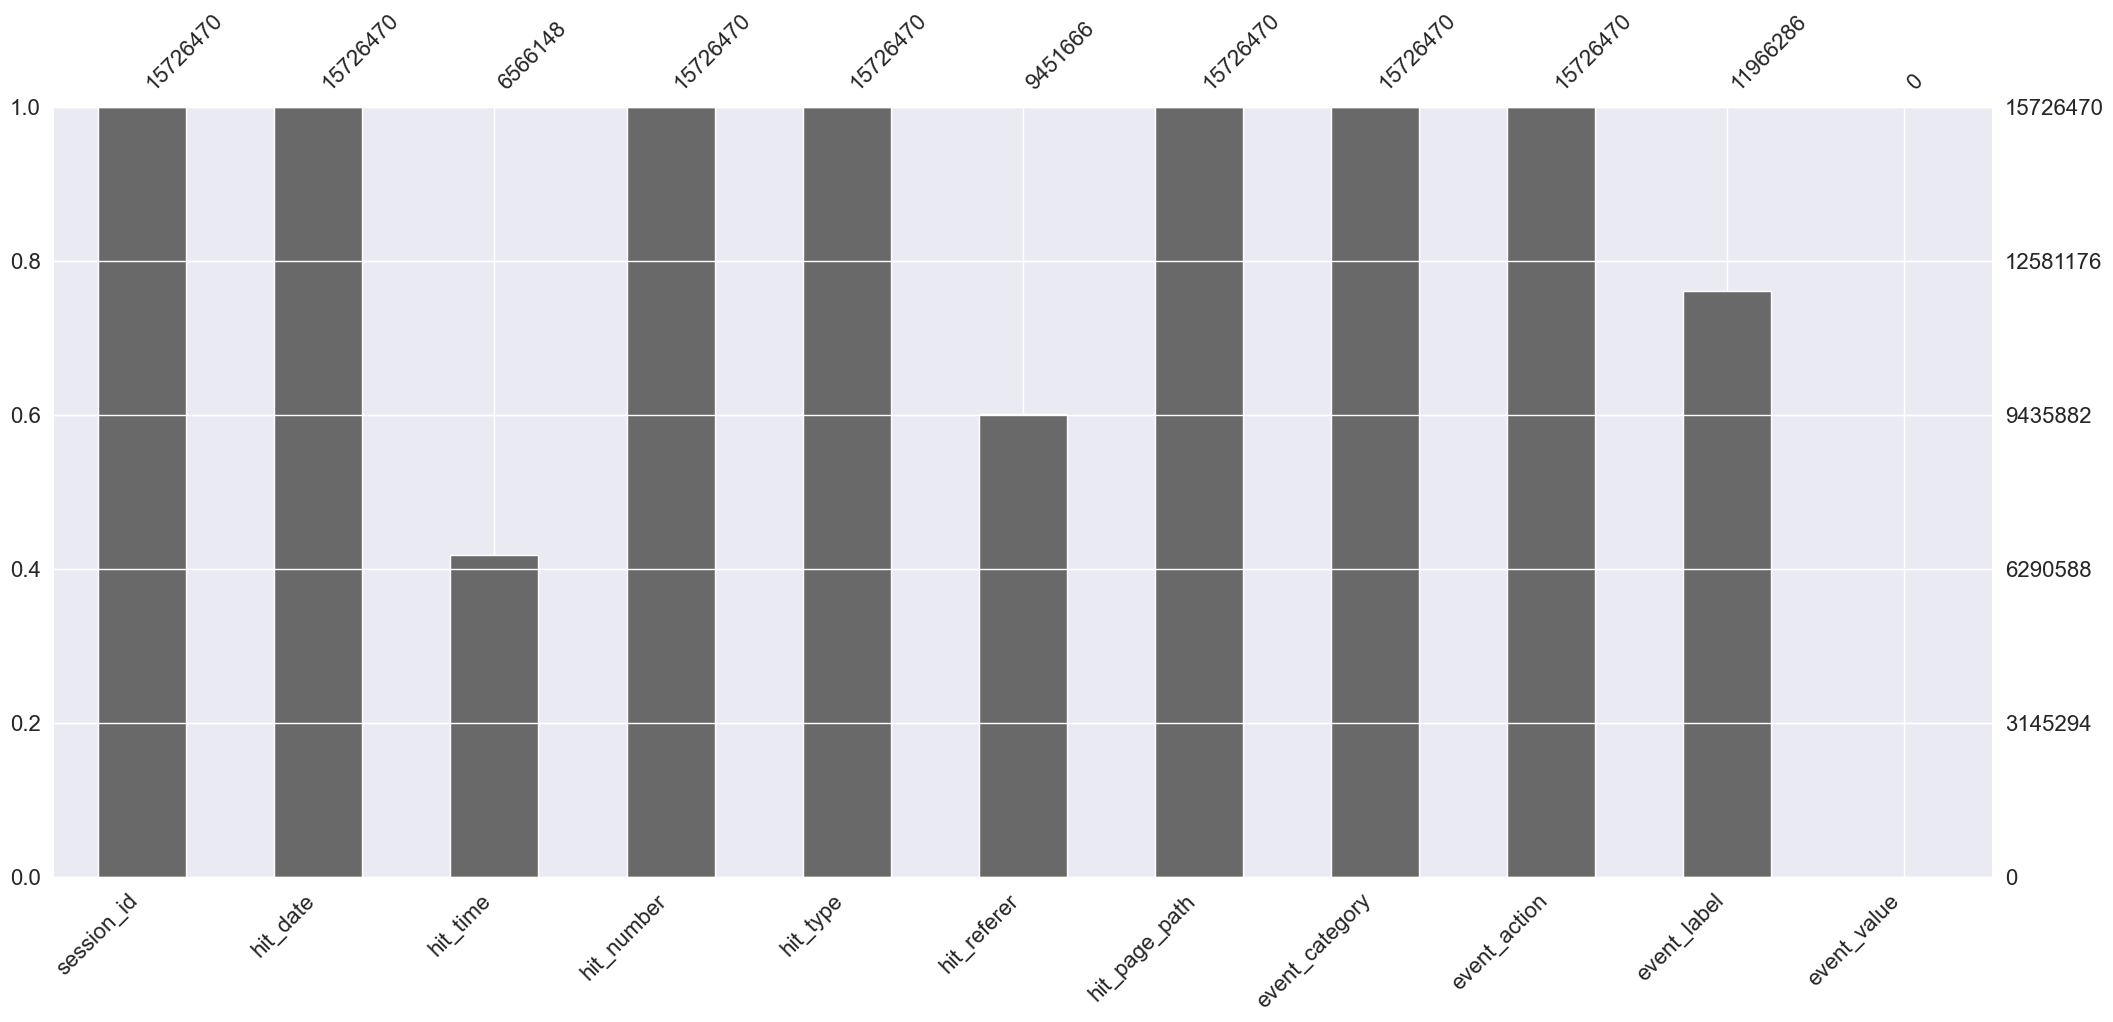

In [18]:
msno.bar(ga_hits);

In [19]:
#Кол-во действий за сессию
ga_hits.session_id.value_counts()

5442565791571325612.1632449195.1632449195    768
6568868914238486437.1632270313.1632270313    678
5959671972744778783.1632490527.1632490600    548
7452598043578978502.1632358598.1632358598    514
3070792010704358528.1629752408.1629752408    498
                                            ... 
4570994095441102117.1630324006.1630324006      1
768506153535315810.1630314342.1630314342       1
5517253735248338264.1630315080.1630315080      1
4054272189286640867.1630334209.1630334209      1
5381267721977892188.1640271196.1640271196      1
Name: session_id, Length: 1734610, dtype: int64

In [20]:
#Среднее кол-во действий за сессию
ga_hits.session_id.value_counts().mean()

9.06628579334836

In [21]:
# Целевые действия
event = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

In [22]:
ga_hits['event_value'] = ga_hits.apply(lambda x: 1 if x.event_action in event else 0, axis=1)

In [23]:
print(f'Процент целевых действий от общего числа действий: {len(ga_hits[ga_hits.event_value == 1]) / len(ga_hits)*100: .2f} %')

Процент целевых действий от общего числа действий:  0.67 %


In [25]:
targets = []
data = []
for target in event:
    value = len(ga_hits[ga_hits.event_action == target])
    percent = len(ga_hits[ga_hits.event_action == target])/len(ga_hits[ga_hits.event_value == 1])*100
    targets.append((target, value, percent))
    data.append(value)
    print(f'{target}: {percent: .2f} %')

sub_car_claim_click:  36.15 %
sub_car_claim_submit_click:  11.78 %
sub_open_dialog_click:  24.66 %
sub_custom_question_submit_click:  0.59 %
sub_call_number_click:  3.48 %
sub_callback_submit_click:  2.93 %
sub_submit_success:  17.58 %
sub_car_request_submit_click:  2.83 %


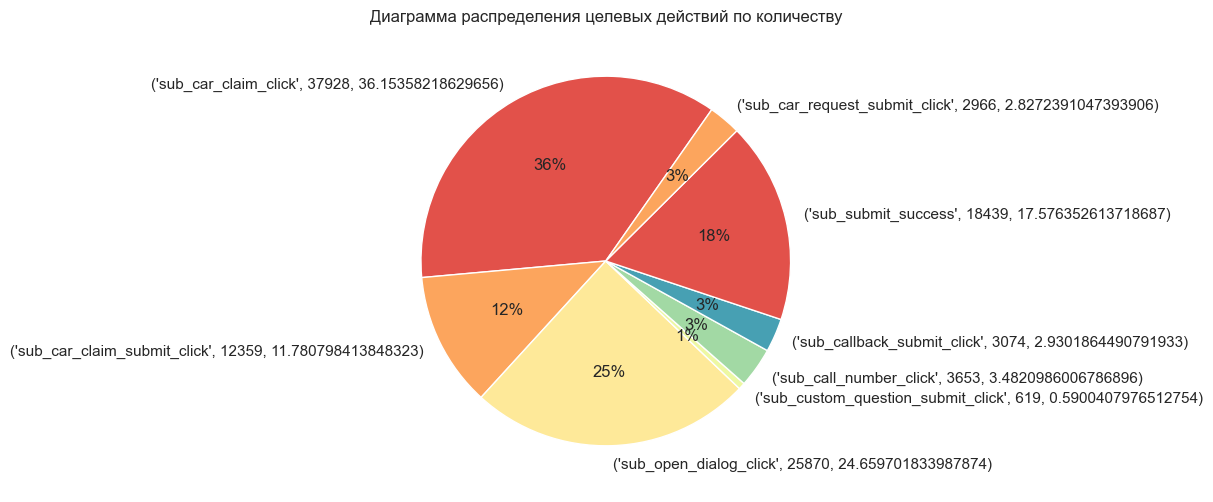

In [26]:
plt.title("Диаграмма распределения целевых действий по количеству")
plt.pie(data, labels=targets, colors=sns.color_palette("Spectral"), autopct='%.0f%%', startangle=55)
plt.show()

# Объединение таблиц

In [27]:
ga_hits = ga_hits[['session_id', 'event_value']]
hits = ga_hits.groupby(by='session_id').sum()
hits['event_value'] = hits.apply(lambda x: 1 if x.event_value >0 else 0, axis=1)

In [28]:
df_full = pd.merge(left=ga_sessions, right=hits, on='session_id', how='inner')

In [29]:
df_full.head(7)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_value
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Apple,NaN,375x812,Safari,Russia,Saint Petersburg,0
6,9055455318486370642.1640843788.1640843788,2108387490.1640843602,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg,0


In [30]:
print(f'Процент сессий с целевым действием: {len(df_full[df_full.event_value == 1]) / len(df_full)*100: .2f} %')

Процент сессий с целевым действием:  2.90 %


# ga_session+target, обзор

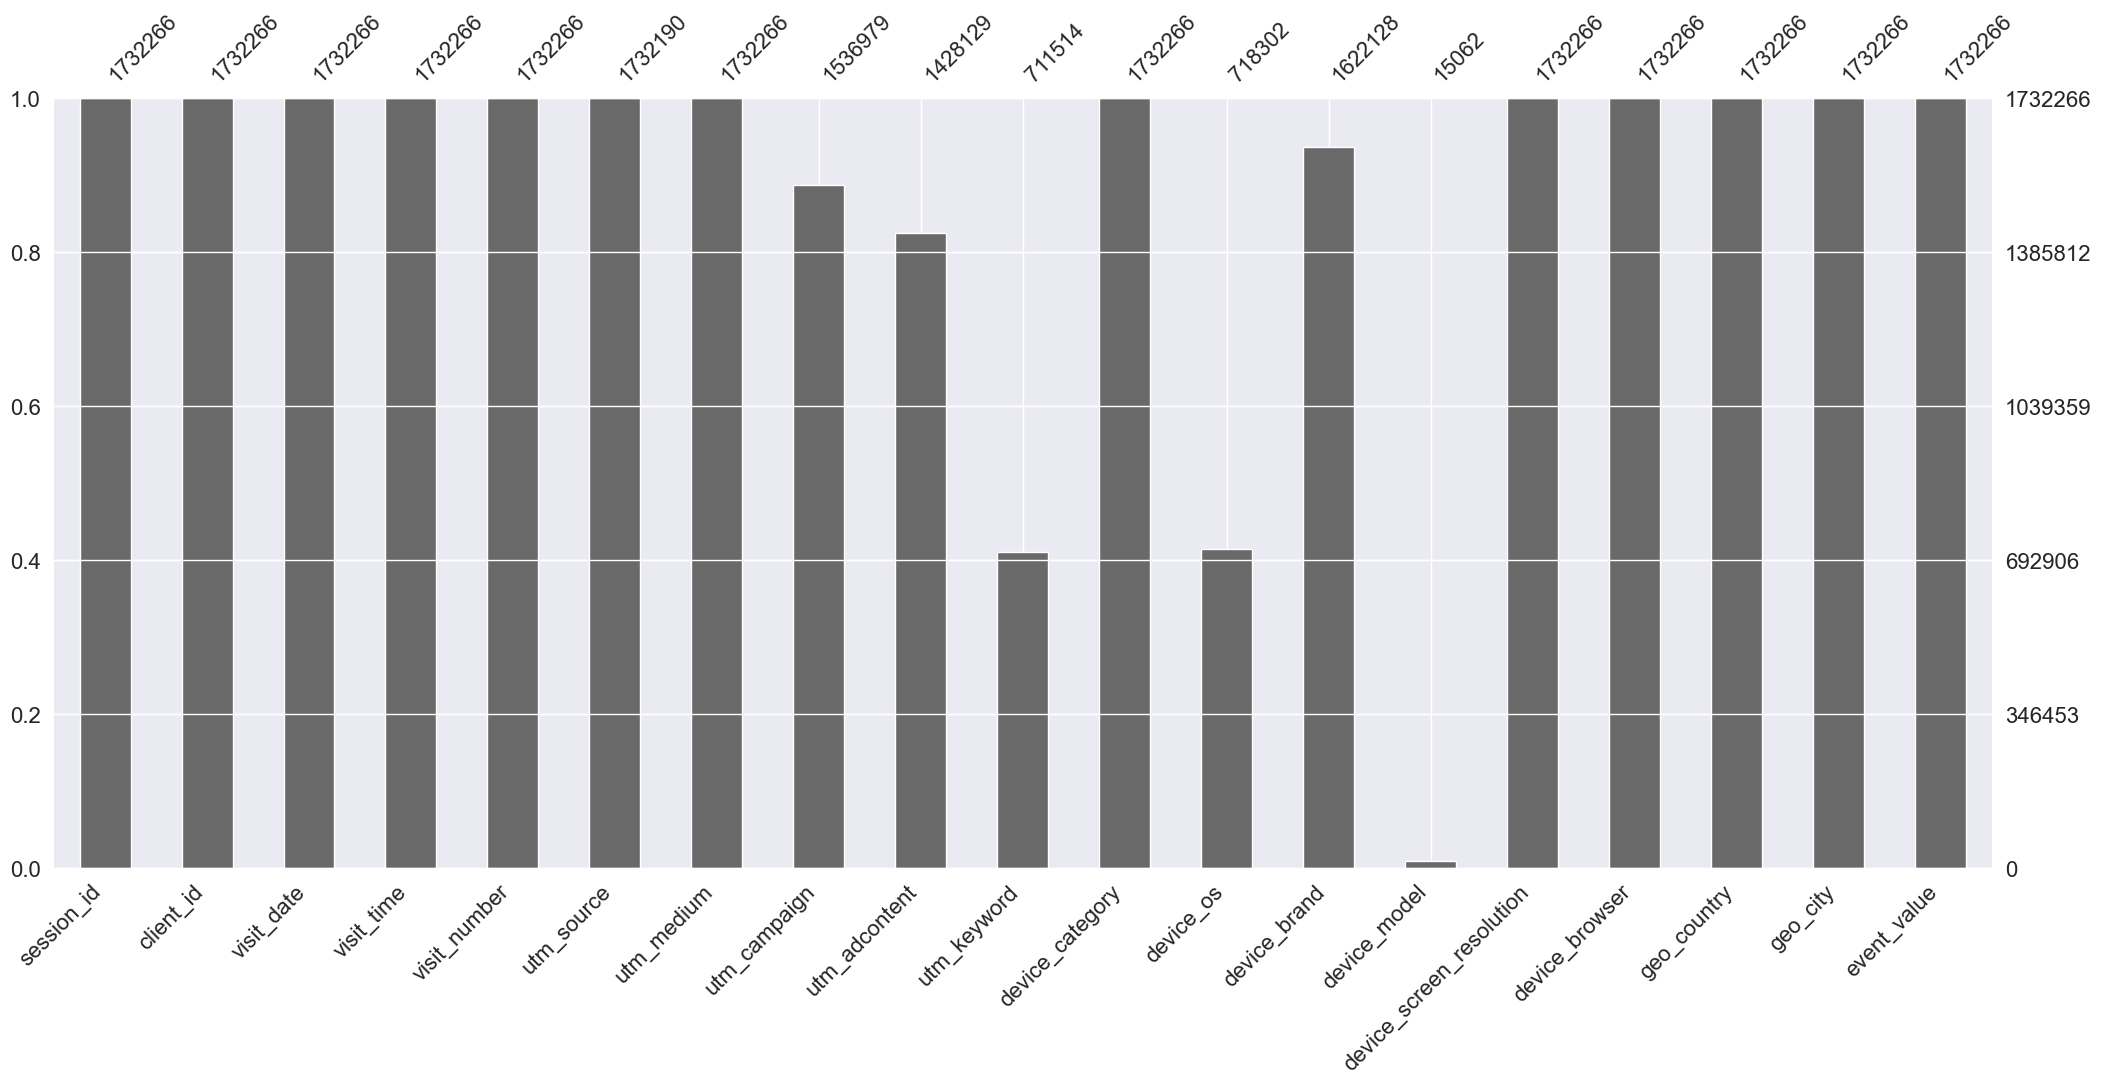

In [31]:
msno.bar(df_full);

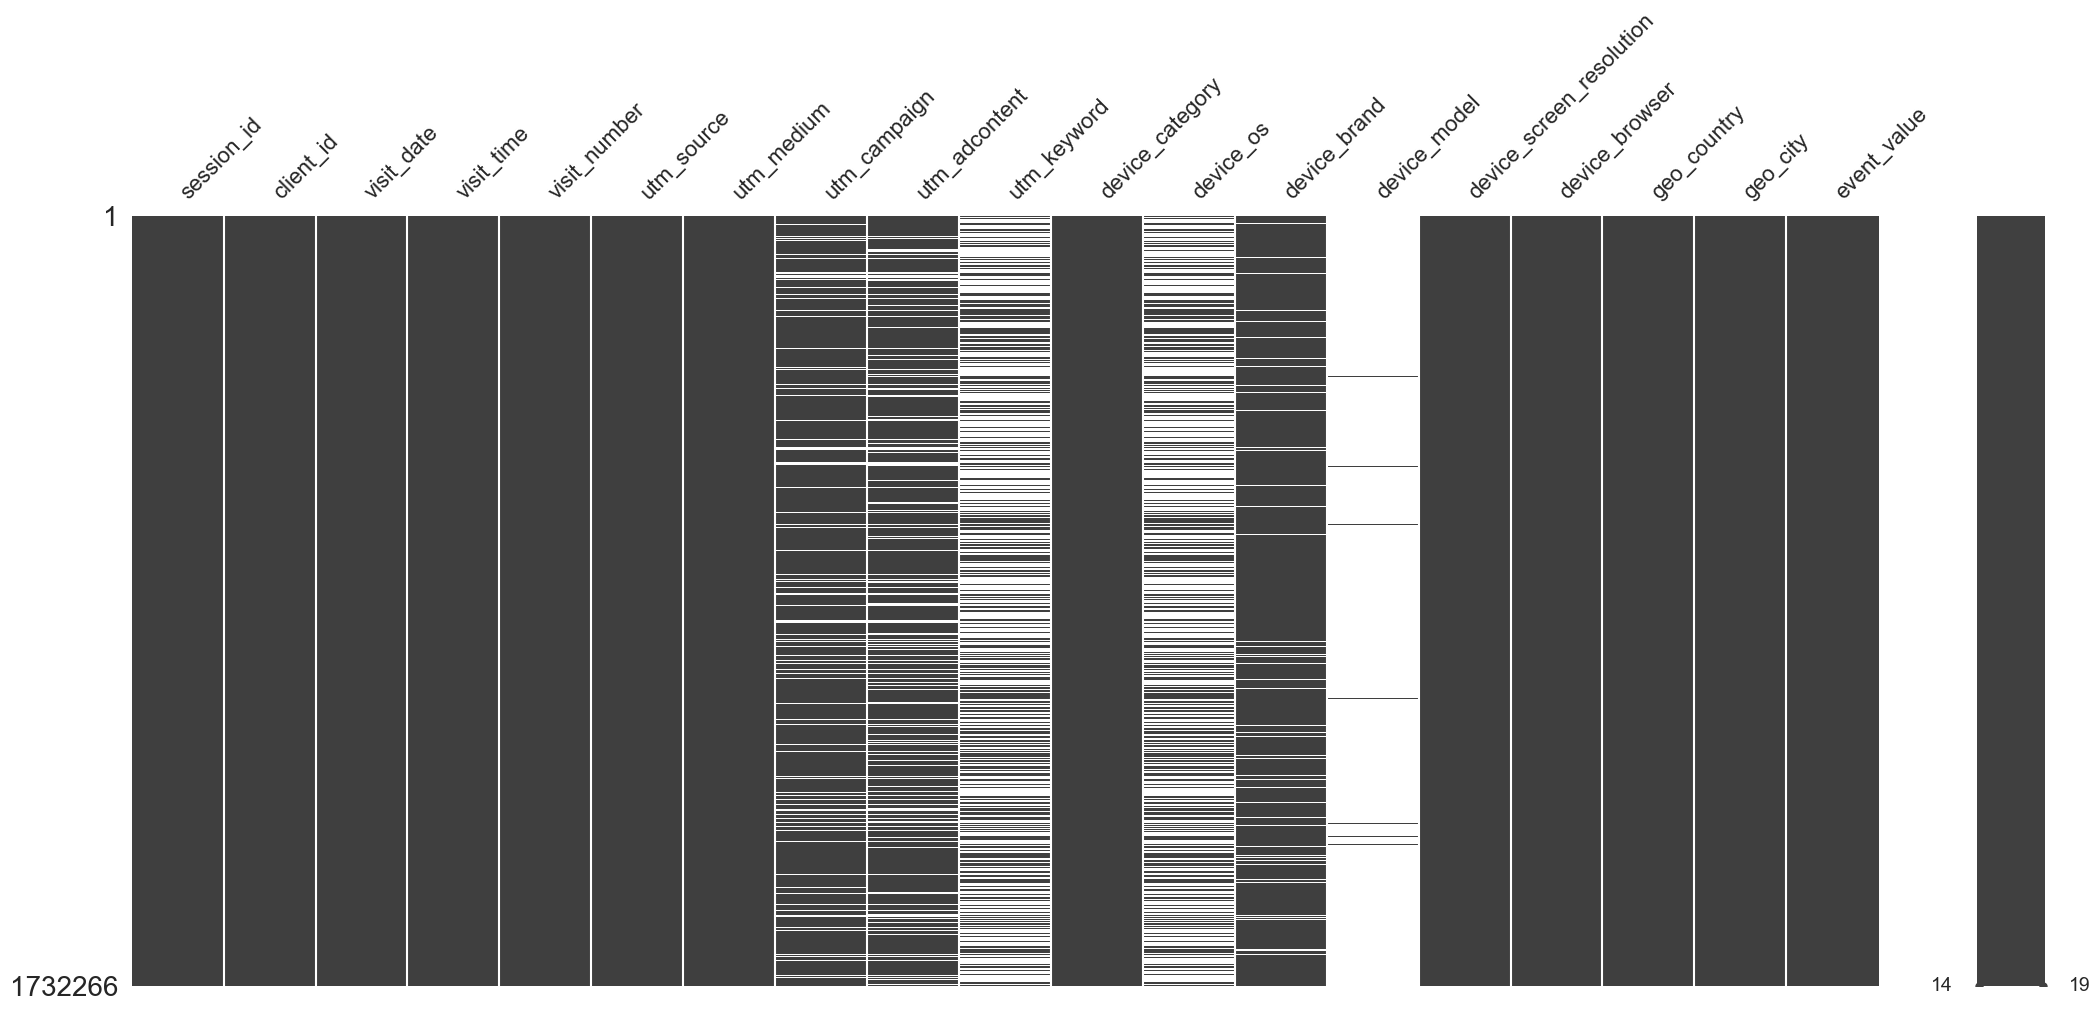

In [32]:
msno.matrix(df_full);

## session_id

In [33]:
print(f'Уникальных значений: {df_full.session_id.nunique()/len(df_full)*100}%')

Уникальных значений: 100.0%


## client_id

In [34]:
print(f'Уникальных значений: {df_full.client_id.nunique()/len(df_full)*100: .2f}%')

Уникальных значений:  76.24%


In [35]:
print(f'Процент клиентов, совершавших целевое действие: {df_full[df_full.event_value == 1].client_id.nunique()/df_full.client_id.nunique()*100: .2f}%')

Процент клиентов, совершавших целевое действие:  3.32%


In [36]:
df_full[['client_id','event_value']].groupby('client_id').sum().value_counts()

event_value
0              1276865
1                39787
2                 2998
3                  631
4                  201
5                   97
6                   43
7                   23
8                   19
9                    8
10                   8
11                   5
12                   3
14                   3
15                   3
13                   2
19                   2
20                   1
22                   1
39                   1
46                   1
51                   1
206                  1
dtype: int64

Есть подорительные аккаунты, совершившие > 10 целевых действий

## Visit_date

In [37]:
df_full['visit_date'] = pd.to_datetime(df_full['visit_date'])

In [38]:
print(f'Количество дней: {df_full.visit_date.nunique()}')

Количество дней: 226


In [39]:
df_full.visit_date.describe()

count                 1732266
unique                    226
top       2021-05-24 00:00:00
freq                    39230
first     2021-05-19 00:00:00
last      2021-12-31 00:00:00
Name: visit_date, dtype: object

In [40]:
df_full[df_full.event_value == 1].visit_date.describe()

count                   50314
unique                    225
top       2021-05-24 00:00:00
freq                     2536
first     2021-05-19 00:00:00
last      2021-12-31 00:00:00
Name: visit_date, dtype: object

### функция для определения процентов целевых действий

In [41]:
def percentage(data: pd.DataFrame, column: str):
    group = data.groupby(column)
    result = pd.DataFrame(index=group.groups)
    result.index.name = column
    result['Кол-во'] = group[column].count()
    result['% от общего'] = result['Кол-во'] / len(data)
    result['кол-во целевых действий'] = group.event_value.sum()
    result['% целевых действий'] = result['кол-во целевых действий'] / result['Кол-во']
    result = result.sort_values(['% целевых действий'], ascending=False)
    result['% от общего'] = result['% от общего'].apply(lambda x: f'{x*100:0.2f}%')
    result['% целевых действий'] = result['% целевых действий'].apply(lambda x: f'{x*100:0.2f}%')
    return(result)

### графики по дням

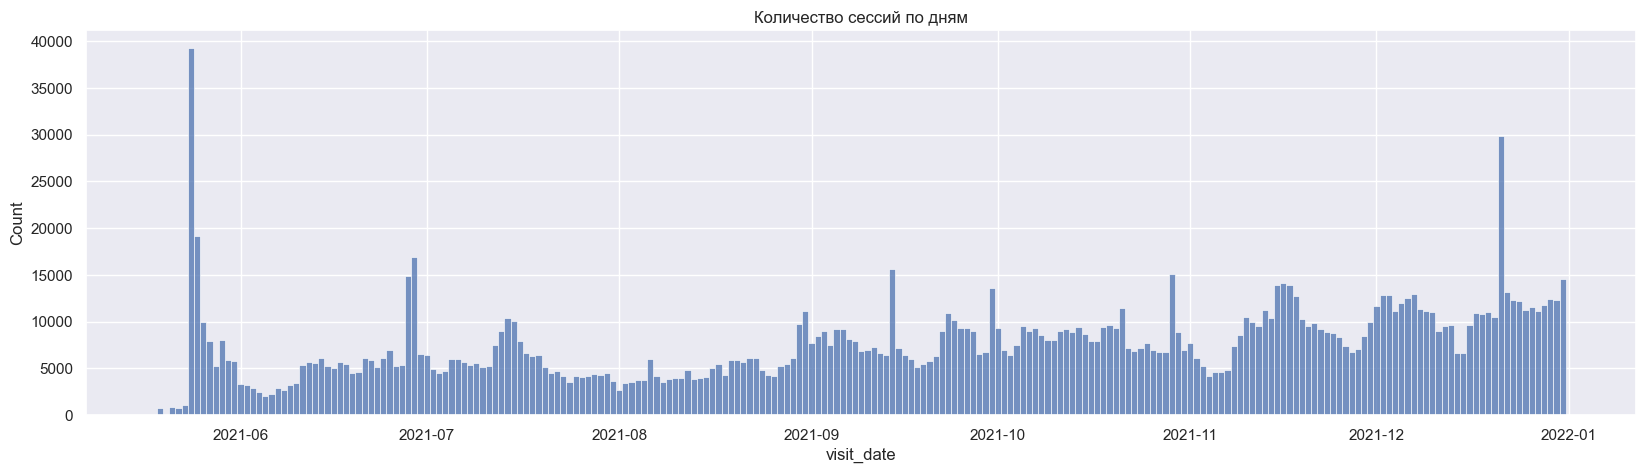

In [42]:
plt.figure(figsize=(20, 5))
sns.histplot(df_full, x='visit_date', discrete=True)
plt.title('Количество сессий по дням');

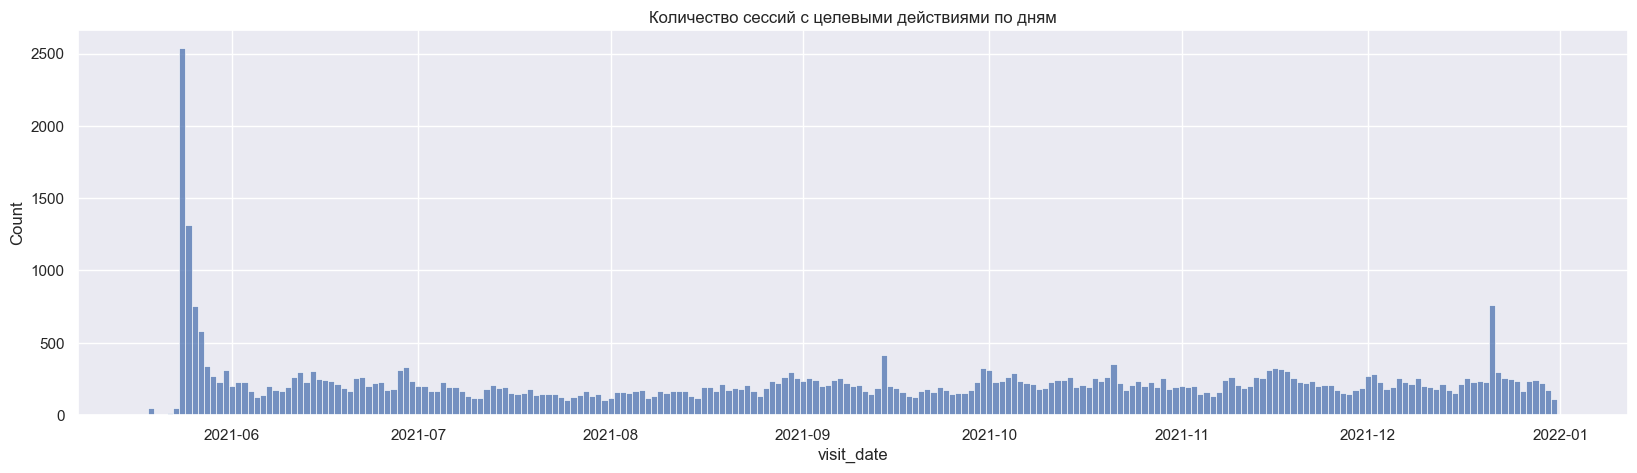

In [43]:
plt.figure(figsize=(20, 5))
sns.histplot(df_full[df_full.event_value == 1], x='visit_date', discrete=True)
plt.title('Количество сессий c целевыми действиями по дням');

In [44]:
#Распределение по дням недели
df_full['weekday'] = df_full['visit_date'].dt.day_of_week

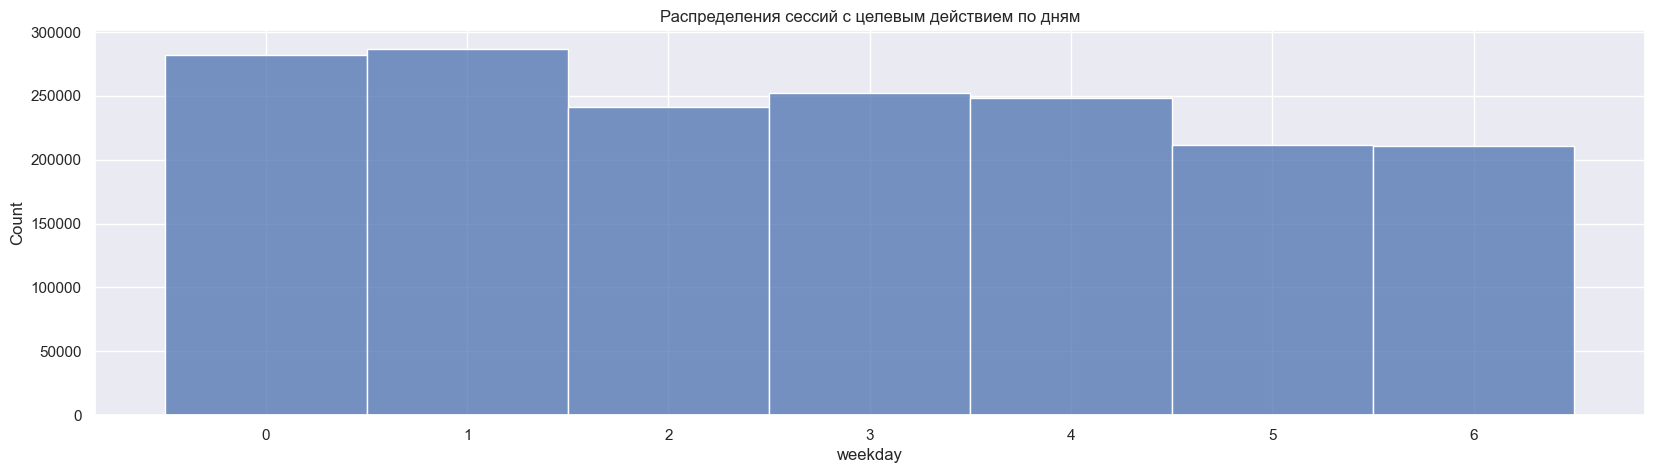

In [45]:
plt.figure(figsize=(20, 5))
sns.histplot(df_full, x='weekday', discrete=True)
plt.title('Распределения сессий с целевым действием по дням');

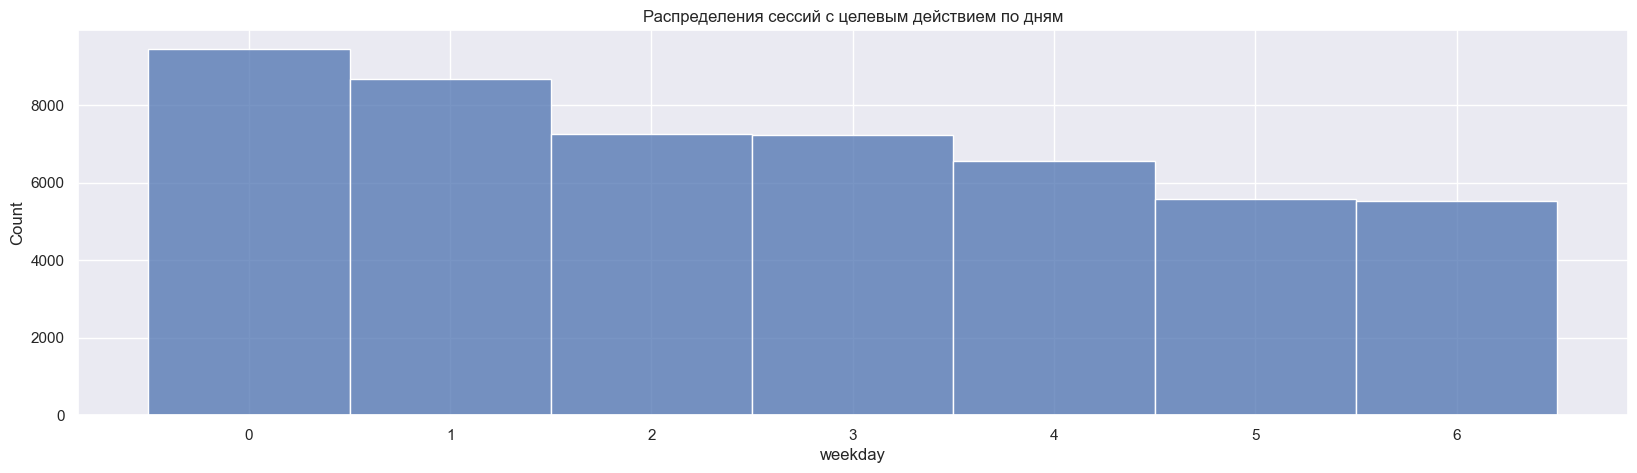

In [46]:
df

### по месяцам

In [47]:
df_full['month'] = df_full['visit_date'].dt.month

In [48]:
percentage(df_full, 'month')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
month,,,,
5,104591,6.04%,6428,6.15%
6,160622,9.27%,6609,4.11%
8,155003,8.95%,5498,3.55%
7,174708,10.09%,4887,2.80%
10,263459,15.21%,7114,2.70%
9,243803,14.07%,6035,2.48%
11,263835,15.23%,6444,2.44%
12,366245,21.14%,7299,1.99%


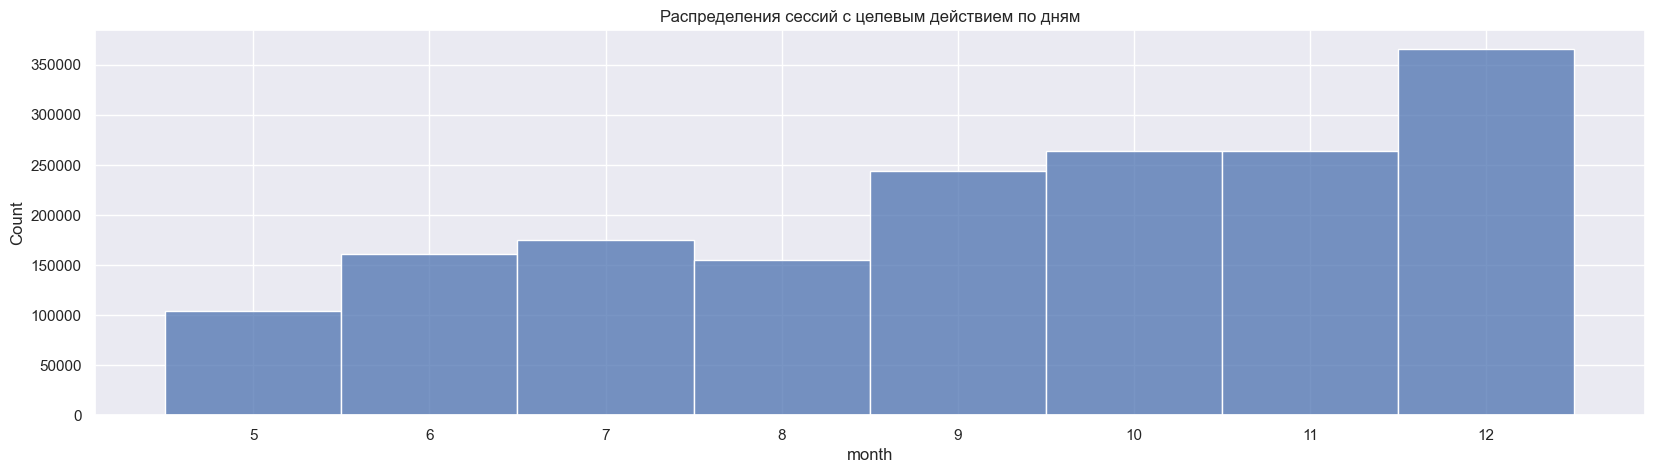

In [49]:
plt.figure(figsize=(20, 5))
sns.histplot(df_full, x='month', discrete=True)
plt.title('Распределения сессий с целевым действием по дням');

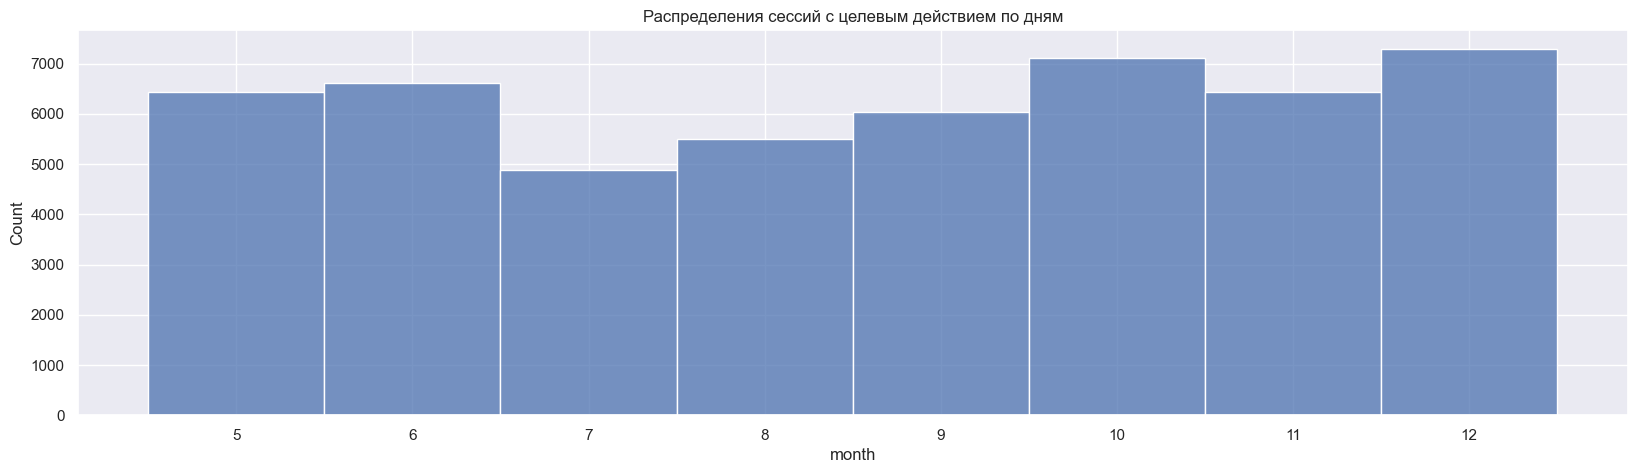

In [50]:
plt.figure(figsize=(20, 5))
sns.histplot(df_full[df_full.event_value == 1], x='month', discrete=True)
plt.title('Распределения сессий с целевым действием по дням');

В первые месяцы сессий было значительно меньше, при этом целевых действий столько же

### по дням месяца

In [51]:
df_full['day'] = df_full['visit_date'].dt.day

In [52]:
percentage(df_full, 'day').head(10)

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
day,,,,
24,91961,5.31%,3879,4.22%
25,71229,4.11%,2588,3.63%
2,45923,2.65%,1555,3.39%
27,56253,3.25%,1896,3.37%
26,58725,3.39%,1931,3.29%
3,44515,2.57%,1450,3.26%
1,48746,2.81%,1531,3.14%
4,41185,2.38%,1279,3.11%
8,46686,2.70%,1372,2.94%


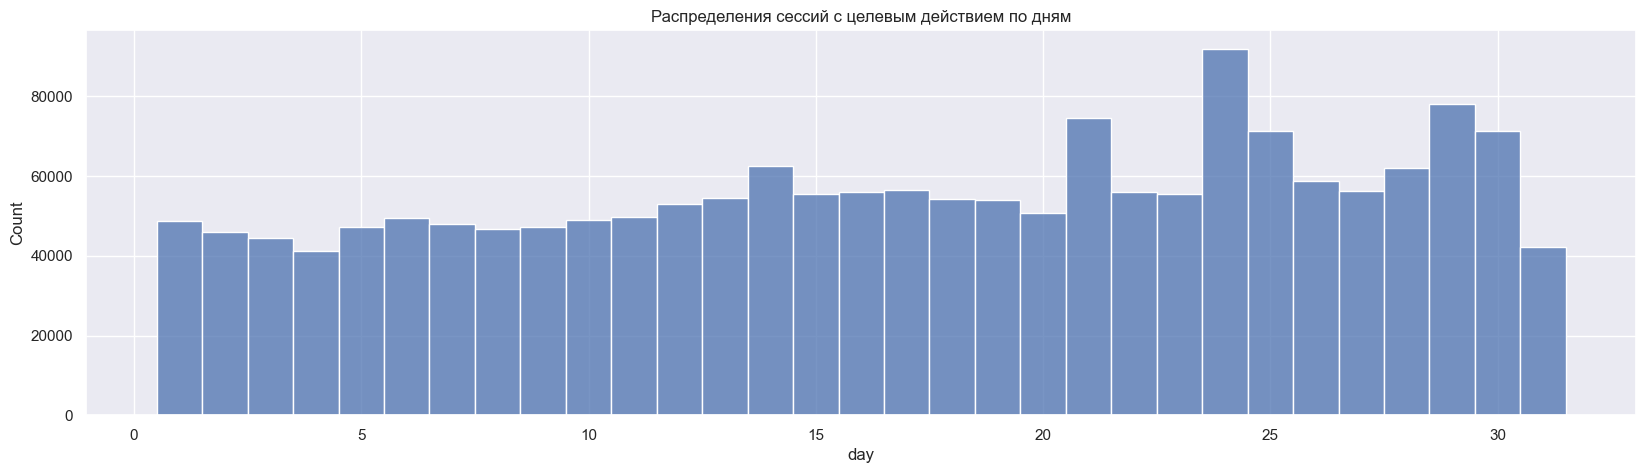

In [53]:
plt.figure(figsize=(20, 5))
sns.histplot(df_full, x='day', discrete=True)
plt.title('Распределения сессий с целевым действием по дням');

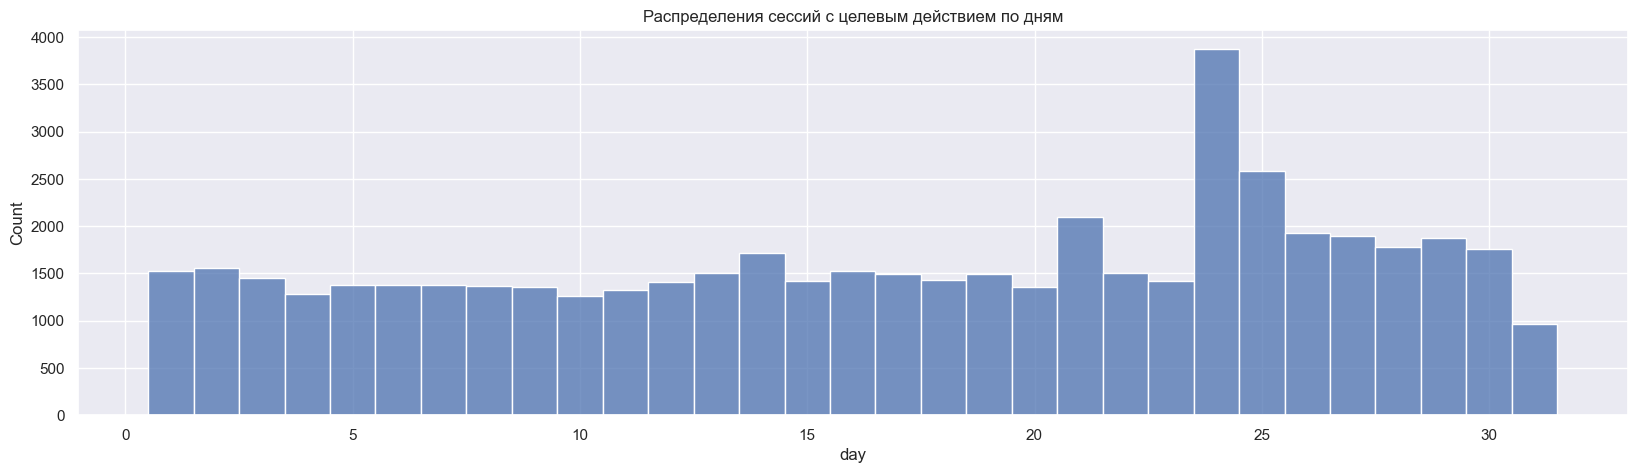

In [54]:
plt.figure(figsize=(20, 5))
sns.histplot(df_full[df_full.event_value == 1], x='day', discrete=True)
plt.title('Распределения сессий с целевым действием по дням');

## Visit_time

In [55]:
df_full['hour'] = df_full.apply(lambda x: x['visit_time'].hour, axis=1)

In [56]:
df_full['minute'] = df_full.apply(lambda x: x['visit_time'].minute, axis=1)

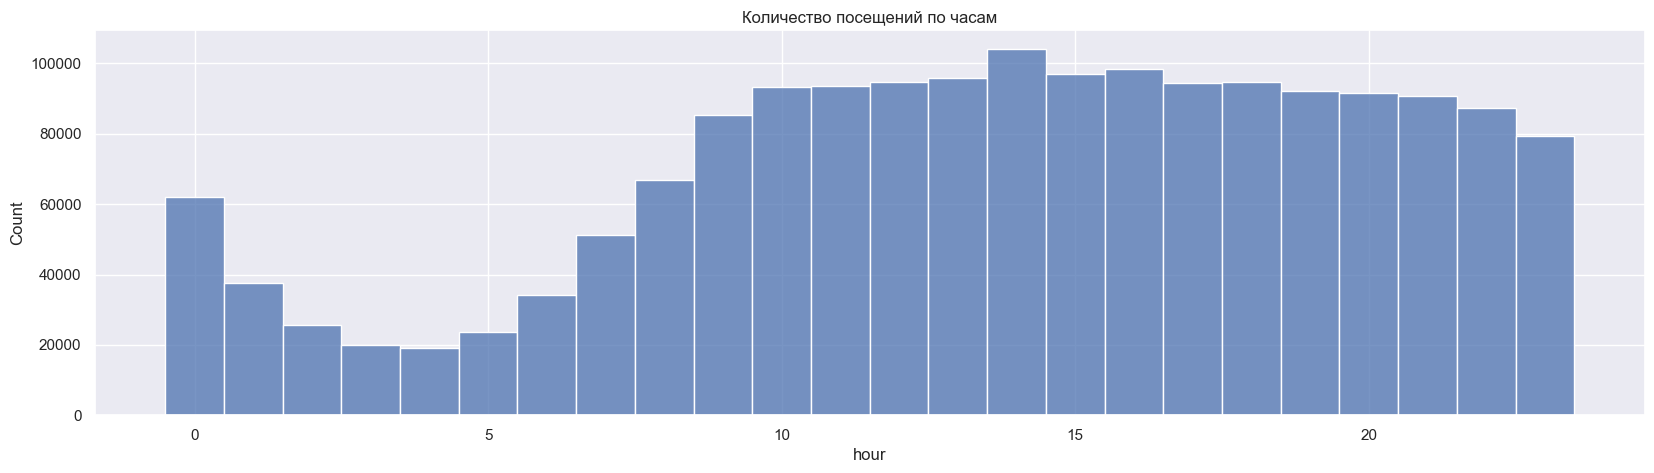

In [57]:
plt.figure(figsize=(20, 5))
sns.histplot(data=df_full, x='hour', discrete=True)
plt.title('Количество посещений по часам');

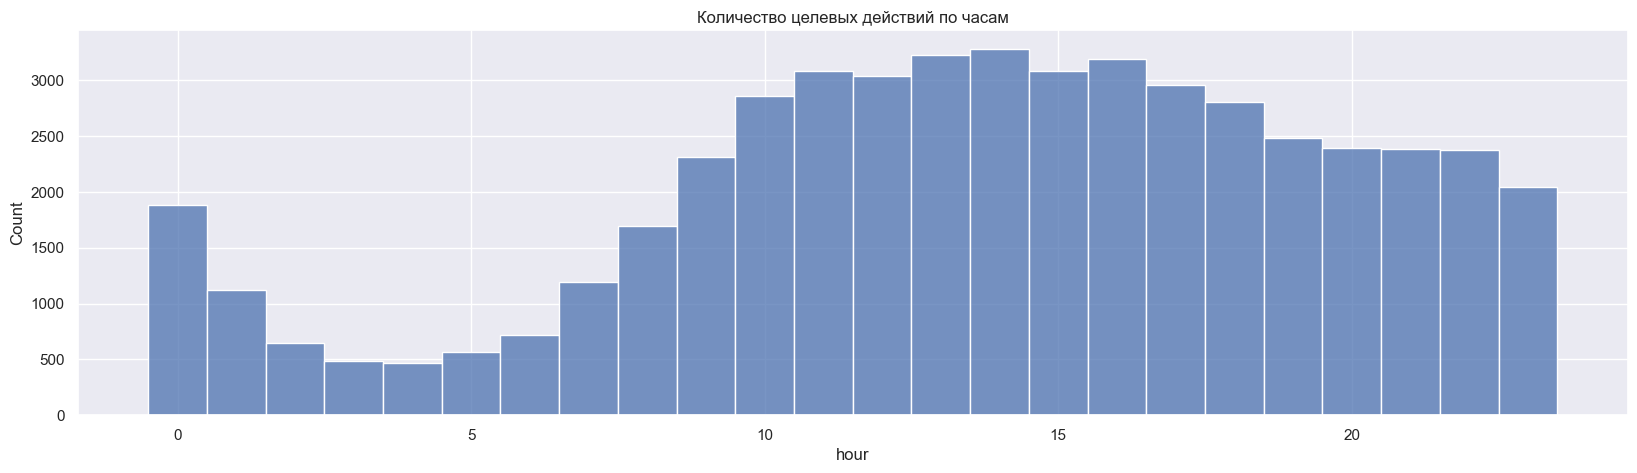

In [58]:
plt.figure(figsize=(20, 5))
sns.histplot(data=df_full[df_full.event_value == 1], x='hour', discrete=True)
plt.title('Количество целевых действий по часам');

In [59]:
percentage(df_full, 'hour')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
hour,,,,
13,95835,5.53%,3230,3.37%
11,93683,5.41%,3083,3.29%
16,98462,5.68%,3188,3.24%
12,94612,5.46%,3039,3.21%
15,96889,5.59%,3080,3.18%
14,104214,6.02%,3285,3.15%
17,94314,5.44%,2959,3.14%
10,93170,5.38%,2857,3.07%
0,62000,3.58%,1886,3.04%


С 2 до 8 худший процент целевых действий.

In [60]:
percentage(df_full, 'minute').head(5)

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
minute,,,,
0,1026031,59.23%,34689,3.38%
1,11658,0.67%,295,2.53%
26,11721,0.68%,293,2.50%
23,11884,0.69%,295,2.48%
42,12374,0.71%,298,2.41%


Большой перекос по минутам в сторону 0 минуты. Остальные распределены более-менее поровну. Скорее всего данные некорректны.

## visit_number

In [61]:
df_full.visit_number.describe().apply(lambda x: f'{x:0.1f}')

count    1732266.0
mean           2.6
std           11.6
min            1.0
25%            1.0
50%            1.0
75%            1.0
max          564.0
Name: visit_number, dtype: object

In [62]:
df_full['visit_number_no_outliers'] = df_full['visit_number'].apply(lambda x: x if x < 15 else 15)

In [63]:
percentage(df_full, 'visit_number_no_outliers')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
visit_number_no_outliers,,,,
6,14515,0.84%,799,5.50%
10,4810,0.28%,257,5.34%
11,3933,0.23%,210,5.34%
9,5924,0.34%,314,5.30%
7,10331,0.60%,530,5.13%
8,7718,0.45%,395,5.12%
4,36600,2.11%,1831,5.00%
5,21482,1.24%,1074,5.00%
13,2762,0.16%,138,5.00%


## utm_source

In [64]:
df_full.utm_source.describe()

count                  1732190
unique                     280
top       ZpYIoDJMcFzVoPFsHGJL
freq                    552555
Name: utm_source, dtype: object

In [65]:
df_full.utm_source.value_counts()

ZpYIoDJMcFzVoPFsHGJL    552555
fDLlAcSmythWSCVMvqvL    277060
kjsLglQLzykiRbcDiGcD    245178
MvfHsxITijuriZxsqZqt    175831
BHcvLfOaCWvWTykYqHVe    110963
                         ...  
DWvtKQncdpXXfLBjBmGj         1
ZsHOHNXkbhgIDlKNiFMf         1
hYVrCkhCPSqKBhZYhWVq         1
OboZzsWwJIeGPLeiLGMq         1
sbJRYgVfvcnqKJNDDYIr         1
Name: utm_source, Length: 280, dtype: int64

In [66]:
percentage(df_full, 'utm_source')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
utm_source,,,,
YpBKcihLLfFjWuxOLfvW,1,0.00%,1,100.00%
fJCYsujgSxIHFbOmgDdN,8,0.00%,7,87.50%
XzfzEBYZWgSDtJNXOadn,2,0.00%,1,50.00%
CqeIpFwJscTsZoYXdHsP,2,0.00%,1,50.00%
yxJKymlSGVuKIPTxbysx,3,0.00%,1,33.33%
...,...,...,...,...
ULAUPJGgNiZYQgwZwZGR,22,0.00%,0,0.00%
VCREhgqUPSUkmfOTvGiW,5,0.00%,0,0.00%
VYDithpzdwvzdnmGEkfp,1,0.00%,0,0.00%


### Функция для сокращения кол-ва значений(>1%)

In [67]:
def replace_to_other(data: pd.Series):
    data = data.copy()
    data = data.fillna('(not set)')
    value_counts = data.value_counts(dropna=False)
    list_to_other = value_counts[value_counts < len(data)*0.005].index.to_list()
    data[data.isin(list_to_other)] = 'other'
    return(data)

In [68]:
df_full['utm_source_new'] = replace_to_other(df_full.utm_source)

In [69]:
percentage(df_full, 'utm_source_new')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
utm_source_new,,,,
aXQzDWsJuGXeBXexNHjc,29528,1.70%,1827,6.19%
bByPQxmDaMXgpHeypKSM,90356,5.22%,5557,6.15%
fDLlAcSmythWSCVMvqvL,277060,15.99%,10531,3.80%
BHcvLfOaCWvWTykYqHVe,110963,6.41%,3882,3.50%
QxAxdyPLuQMEcrdZWdWb,45267,2.61%,1404,3.10%
ZpYIoDJMcFzVoPFsHGJL,552555,31.90%,15998,2.90%
kjsLglQLzykiRbcDiGcD,245178,14.15%,6293,2.57%
other,73862,4.26%,1731,2.34%
jaSOmLICuBzCFqHfBdRg,28288,1.63%,401,1.42%


In [70]:
is_social = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

In [71]:
df_full['is_social'] = df_full.apply(lambda x: 1 if x.utm_source in is_social else 0, axis=1)

In [72]:
percentage(df_full, 'is_social')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is_social,,,,
0,1475986,85.21%,46293,3.14%
1,256280,14.79%,4021,1.57%


И соцсетей 14,79% трафика, но он реже приводит к целевым действиям.

## utm_medium

In [73]:
df_full.utm_medium.describe()

count     1732266
unique         55
top        banner
freq       525206
Name: utm_medium, dtype: object

In [74]:
df_full.utm_medium.value_counts()

banner               525206
cpc                  399395
(none)               277060
cpm                  229791
referral             136851
organic               55009
email                 28287
push                  27710
stories               10472
cpv                    7815
blogger_channel        7731
smartbanner            6501
blogger_stories        4226
tg                     3920
cpa                    3266
post                   2227
outlook                1269
app                    1211
smm                    1194
clicks                  908
blogger_header          760
(not set)               405
info_text               335
sms                     194
landing                 127
partner                  95
link                     52
cbaafe                   43
CPM                      36
yandex_cpc               31
vk_smm                   25
static                   17
google_cpc               15
article                  15
web_polka                11
fb_smm              

In [75]:
df_full.utm_medium[df_full.utm_medium == '(none)'] = '(not set)'

In [76]:
df_full['utm_source_new'] = replace_to_other(df_full.utm_source)

In [77]:
percentage(df_full, 'utm_source_new')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
utm_source_new,,,,
aXQzDWsJuGXeBXexNHjc,29528,1.70%,1827,6.19%
bByPQxmDaMXgpHeypKSM,90356,5.22%,5557,6.15%
fDLlAcSmythWSCVMvqvL,277060,15.99%,10531,3.80%
BHcvLfOaCWvWTykYqHVe,110963,6.41%,3882,3.50%
QxAxdyPLuQMEcrdZWdWb,45267,2.61%,1404,3.10%
ZpYIoDJMcFzVoPFsHGJL,552555,31.90%,15998,2.90%
kjsLglQLzykiRbcDiGcD,245178,14.15%,6293,2.57%
other,73862,4.26%,1731,2.34%
jaSOmLICuBzCFqHfBdRg,28288,1.63%,401,1.42%


In [78]:
is_organic = ['organic', 'referral', '(not set)']

In [79]:
df_full['is_organic'] = df_full.apply(lambda x: 1 if x.utm_medium in is_organic else 0, axis=1)

In [80]:
percentage(df_full, 'is_organic')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is_organic,,,,
1,469325,27.09%,20840,4.44%
0,1262941,72.91%,29474,2.33%


## utm_campaign

In [81]:
df_full.utm_campaign.describe()

count                  1536979
unique                     406
top       LTuZkdKfxRGVceoWkVyg
freq                    422992
Name: utm_campaign, dtype: object

In [82]:
df_full.utm_campaign.isna().sum()

195287

In [83]:
df_full.utm_campaign.value_counts(dropna=False)

LTuZkdKfxRGVceoWkVyg    422992
LEoPHuyFvzoNfnzGgfcd    321286
FTjNLDyTrXaWYgZymFkV    234950
NaN                     195287
gecBYcKZCPMcVYdSSzKP    133247
                         ...  
qPDTdivQVeflLjTYIJnG         1
InOGyxvxAfYvSHCpIjJZ         1
ehLonfPENrOEoPTIyiOZ         1
YlsczTIyBSwTLNtuDkCd         1
cXxuwXPoQCvAXPHpFcZl         1
Name: utm_campaign, Length: 407, dtype: int64

In [84]:
df_full['utm_campaign_new'] = replace_to_other(df_full.utm_campaign)

In [85]:
percentage(df_full, 'utm_campaign_new')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
utm_campaign_new,,,,
LTuZkdKfxRGVceoWkVyg,422992,24.42%,19006,4.49%
(not set),195287,11.27%,7174,3.67%
gecBYcKZCPMcVYdSSzKP,133247,7.69%,4545,3.41%
LEoPHuyFvzoNfnzGgfcd,321286,18.55%,9348,2.91%
sbJRYgVfvcnqKJNDDYIr,19942,1.15%,575,2.88%
SgIUDYUKnyWHVowUOqid,15784,0.91%,373,2.36%
zxoiLxhuSIFrCeTLQVWZ,12234,0.71%,270,2.21%
other,218319,12.60%,4511,2.07%
nSReTmyFtbSjlPrTKoaX,11272,0.65%,232,2.06%


## utm_adcontent

In [86]:
df_full.utm_adcontent.value_counts()

JNHcPlZPxEMWDnRiyoBf    935408
vCIpmpaGBnIQhyYNkXqp    179438
xhoenQgDQsgfEPYNPwKO    104381
PkybGvWbaqORmxjNunqZ     59038
LLfCasrxQzJIyuldcuWy     18138
                         ...  
fiImkyBmzQSeAeQEVCDZ         1
uUDFLZnWKzkthhRGUTvb         1
vXARZToVDdvNhALiQtvl         1
gQEnaeQmOHisHSTEyzhp         1
oJivRDNIrrOckRBIKOtG         1
Name: utm_adcontent, Length: 280, dtype: int64

In [87]:
df_full['utm_adcontent_new'] = replace_to_other(df_full.utm_adcontent)

In [88]:
percentage(df_full, 'utm_adcontent_new')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
utm_adcontent_new,,,,
JNHcPlZPxEMWDnRiyoBf,935408,54.00%,33963,3.63%
(not set),304137,17.56%,8753,2.88%
vCIpmpaGBnIQhyYNkXqp,179438,10.36%,3911,2.18%
PkybGvWbaqORmxjNunqZ,59038,3.41%,978,1.66%
other,80837,4.67%,1302,1.61%
xhoenQgDQsgfEPYNPwKO,104381,6.03%,1272,1.22%
dUuXlWzvmhDSyclWRhNP,10025,0.58%,55,0.55%
LLfCasrxQzJIyuldcuWy,18138,1.05%,72,0.40%
yYdBRbPmBMUZHXwqGxNx,9631,0.56%,4,0.04%


## utm_keyword

In [89]:
df_full.utm_keyword.value_counts(dropna=False)

NaN                     1020752
puhZPIYqKXeFPaUviSjo     465950
aXQzDWsJuGXeBXexNHjc      18154
ITfrGJNwVsHBGJMAKoct      12395
pHqgLcdBQPSLcrTpLkdr      12320
                         ...   
VBmazutCflYumtDHrQYe          1
jWQZKvbKuDnnQLCqeuOF          1
WFIDyezrAGnnopAqVVDs          1
NLWjXuYiXlKrFJfSWfKt          1
fcXWTQaKfxbkBkBnzLhK          1
Name: utm_keyword, Length: 1193, dtype: int64

In [90]:
percentage(df_full, 'utm_keyword').head(100)

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
utm_keyword,,,,
sasMLQqRnLGImIVczyca,1,0.00%,1,100.00%
KUROllwAYyecYcjFOgAi,1,0.00%,1,100.00%
WPZFTVRTmwVTvqqeSvcx,1,0.00%,1,100.00%
ZsHOHNXkbhgIDlKNiFMf,1,0.00%,1,100.00%
WJUKqfeOrjXIOHjgcgdR,1,0.00%,1,100.00%
...,...,...,...,...
jCIRaffxlokbeWIRXHKg,53,0.00%,3,5.66%
HVQdipMDpgJKXAzecwqn,18,0.00%,1,5.56%
WufphiXPXHjYKWOlEjpJ,18,0.00%,1,5.56%


In [91]:
df_full['utm_keyword_new'] = replace_to_other(df_full.utm_keyword)

In [92]:
percentage(df_full, 'utm_keyword_new')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
utm_keyword_new,,,,
(not set),1020752,58.93%,34583,3.39%
hAmNSZmQkKQKAjZEGlgb,10422,0.60%,349,3.35%
UKNBOHebRIIsQRsjNKay,10287,0.59%,305,2.96%
ITfrGJNwVsHBGJMAKoct,12395,0.72%,322,2.60%
puhZPIYqKXeFPaUviSjo,465950,26.90%,11185,2.40%
other,181986,10.51%,3385,1.86%
pHqgLcdBQPSLcrTpLkdr,12320,0.71%,112,0.91%
aXQzDWsJuGXeBXexNHjc,18154,1.05%,73,0.40%


В столбце около 60% строк не заполнено. 1193 уникальных значения. Столбец использоваться не будет.

## device_category

In [93]:
df_full.device_category.value_counts(dropna=False)

mobile     1368679
desktop     346891
tablet       16696
Name: device_category, dtype: int64

In [94]:
percentage(df_full, 'device_category')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
device_category,,,,
desktop,346891,20.03%,11513,3.32%
mobile,1368679,79.01%,38379,2.80%
tablet,16696,0.96%,422,2.53%


## device_os

In [95]:
df_full.device_os.value_counts(dropna=False)

None             1013964
Android           425520
iOS               182597
Windows            81740
Macintosh          23415
Linux               4616
(not set)            309
Chrome OS             65
BlackBerry            24
Tizen                  7
Firefox OS             3
Nokia                  2
Samsung                2
Windows Phone          2
Name: device_os, dtype: int64

In [96]:
df_full.device_os[(df_full.device_os.isna()) & (df_full.device_brand == 'Apple')] = 'iOS'

In [97]:
df_full.device_os[(df_full.device_os.isna()) & (df_full.device_brand != '') & (df_full.device_brand != '(not set)')] = 'Android'

In [98]:
df_full.device_os.value_counts(dropna=False)

Android          874111
iOS              503538
None             244432
Windows           81740
Macintosh         23415
Linux              4616
(not set)           309
Chrome OS            65
BlackBerry           24
Tizen                 7
Firefox OS            3
Nokia                 2
Samsung               2
Windows Phone         2
Name: device_os, dtype: int64

In [99]:
percentage(df_full, 'device_os')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
device_os,,,,
Macintosh,23415,1.35%,772,3.30%
iOS,503538,29.07%,14467,2.87%
Android,874111,50.46%,24084,2.76%
Windows,81740,4.72%,1633,2.00%
Linux,4616,0.27%,90,1.95%
(not set),309,0.02%,0,0.00%
BlackBerry,24,0.00%,0,0.00%
Chrome OS,65,0.00%,0,0.00%
Firefox OS,3,0.00%,0,0.00%


In [100]:
df_full['device_os_new'] = replace_to_other(df_full.device_os)

In [101]:
percentage(df_full, 'device_os_new')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
device_os_new,,,,
(not set),244741,14.13%,9268,3.79%
Macintosh,23415,1.35%,772,3.30%
iOS,503538,29.07%,14467,2.87%
Android,874111,50.46%,24084,2.76%
Windows,81740,4.72%,1633,2.00%
other,4721,0.27%,90,1.91%


In [102]:
df_full[df_full.device_os.isna()].describe(include='all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_value,weekday,month,day,hour,minute,visit_number_no_outliers,utm_source_new,is_social,is_organic,utm_campaign_new,utm_adcontent_new,utm_keyword_new,device_os_new
count,244432,244432,244432,244432,244432.000000,244432,244432,204906,183968,0,244432,0,244432,0,244432,244432,244432,244432,244432.000000,244432.000000,244432.000000,244432.000000,244432.000000,244432.0,244432.000000,244432,244432.000000,244432.000000,244432,244432,244432,244432
unique,244432,173125,156,24,NaN,159,29,240,209,0,3,0,2,0,1487,33,116,1163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,16,9,1,1
top,9055657327967035032.1629707931.1629707931,736859557.1619557452,2021-05-24 00:00:00,13:00:00,NaN,fDLlAcSmythWSCVMvqvL,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,,NaN,1920x1080,Chrome,Russia,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fDLlAcSmythWSCVMvqvL,NaN,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,(not set),(not set)
freq,1,301,15549,17508,NaN,55959,69624,103425,120715,NaN,236712,NaN,237058,NaN,82297,145974,234538,116489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55959,NaN,NaN,103425,120715,244432,244432
first,NaN,NaN,2021-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-10-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.510821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037916,2.394474,7.564001,16.814893,13.190008,0.0,2.427583,NaN,0.126420,0.472810,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,16.965544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190995,1.895041,1.583356,8.485798,5.667406,0.0,3.403402,NaN,0.332322,0.499261,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,5.000000,1.000000,0.000000,0.0,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,6.000000,10.000000,10.000000,0.0,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN


In [103]:
df_full[df_full.device_os.isna()].device_brand.value_counts()

             237058
(not set)      7374
Name: device_brand, dtype: int64

In [104]:
df_full[df_full.device_category == 'desktop'].device_os.value_counts(dropna=False)

None         236712
Windows       81724
Macintosh     23395
Linux          4562
(not set)       302
iOS              70
Chrome OS        65
Android          59
Tizen             2
Name: device_os, dtype: int64

In [105]:
round(len(df_full[df_full.device_os.isna()])/len(df_full)*100, 2)

14.11

In [106]:
df_full.device_os[(df_full.device_os.isna()) & (df_full.device_category == 'desktop')] = 'desctop_unknown'

In [107]:
percentage(df_full, 'device_os')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
device_os,,,,
desctop_unknown,236712,13.66%,9018,3.81%
Macintosh,23415,1.35%,772,3.30%
iOS,503538,29.07%,14467,2.87%
Android,874111,50.46%,24084,2.76%
Windows,81740,4.72%,1633,2.00%
Linux,4616,0.27%,90,1.95%
(not set),309,0.02%,0,0.00%
BlackBerry,24,0.00%,0,0.00%
Chrome OS,65,0.00%,0,0.00%


In [108]:
df_full['device_os_new'] = replace_to_other(df_full.device_os)

In [109]:
percentage(df_full, 'device_os_new')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
device_os_new,,,,
desctop_unknown,236712,13.66%,9018,3.81%
Macintosh,23415,1.35%,772,3.30%
iOS,503538,29.07%,14467,2.87%
Android,874111,50.46%,24084,2.76%
other,12750,0.74%,340,2.67%
Windows,81740,4.72%,1633,2.00%


Стобец скорее всего испольоваться не будет - велика вероятность ошибки. Наиболее распространенной системой компьютеров является windows, из которой приходит только 2% целевых действий. При этом Unknown даёт процент целевых действий почти в 2 раза больше.

In [110]:
df_full = df_full.drop(columns=['device_os_new'])

In [111]:
df_full['is_apple'] = df_full.apply(lambda x: 1 if x.device_os == 'iOS' else 0, axis=1)

In [112]:
percentage(df_full, 'is_apple')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is apple,,,,
0,1228728,70.93%,35847,2.92%
1,503538,29.07%,14467,2.87%


In [113]:
df_full['is_Android'] = df_full.apply(lambda x: 1 if x.device_os == 'Android' else 0, axis=1)

In [114]:
percentage(df_full, 'is_Android')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is Android,,,,
0,858155,49.54%,26230,3.06%
1,874111,50.46%,24084,2.76%


## device_brand

In [115]:
df_full.device_brand.value_counts(dropna=False).head(20)

Apple        503533
Samsung      311641
Xiaomi       269251
             237058
Huawei       173828
None         110138
Realme        17926
(not set)     16392
OPPO          12775
Vivo          11026
OnePlus        9322
Asus           7487
Nokia          6864
Sony           6106
ZTE            5987
Google         4472
Meizu          3529
Lenovo         2942
Blackview      2592
Tecno          2501
Name: device_brand, dtype: int64

In [116]:
df_full[(df_full.device_brand.isna()) | (df_full.device_brand == '(not set)') | (df_full.device_brand == '')].describe(include='all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_value,weekday,month,day,hour,minute,visit_number_no_outliers,utm_source_new,is_social,is_organic,utm_campaign_new,utm_adcontent_new,utm_keyword_new,is apple,is Android
count,363588,363588,363588,363588,363588.000000,363540,363588,303749,278333,118594,363588,355868,253450,9018,363588,363588,363588,363588,363588.000000,363588.000000,363588.000000,363588.000000,363588.000000,363588.000000,363588.000000,363588,363588.000000,363588.000000,363588,363588,363588,363588.000000,363588.000000
unique,363588,254687,226,57202,NaN,234,46,349,257,884,3,9,2,1,2231,37,125,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,20,11,8,NaN,NaN
top,9055505230298952295.1638478433.1638478433,1750498477.1629450062,2021-05-24 00:00:00,13:00:00,NaN,fDLlAcSmythWSCVMvqvL,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,desctop_unknown,,AuMdmADEIoPXiWpTsBEj,1920x1080,Chrome,Russia,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fDLlAcSmythWSCVMvqvL,NaN,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,(not set),NaN,NaN
freq,1,448,15549,17510,NaN,74356,104588,137607,172765,48886,346762,236712,237058,9018,119175,216763,349475,173238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74356,NaN,NaN,137607,172765,244994,NaN,NaN
first,NaN,NaN,2021-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.701021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032927,2.517974,8.779080,17.196115,13.470904,9.715876,2.530914,NaN,0.126426,0.452498,NaN,NaN,NaN,0.000014,0.024751
std,NaN,NaN,NaN,NaN,23.786818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.178447,1.889075,2.214159,8.725769,5.653512,17.064024,3.569404,NaN,0.332329,0.497739,NaN,NaN,NaN,0.003708,0.155364
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,7.000000,10.000000,10.000000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000


In [117]:
percentage(df_full, 'device_brand').sort_values(['% от общего'], ascending=False).head(10)

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
device_brand,,,,
Apple,503533,29.07%,14467,2.87%
Samsung,311641,17.99%,10054,3.23%
Xiaomi,269251,15.54%,6592,2.45%
,237058,13.68%,9023,3.81%
Huawei,173828,10.03%,4519,2.60%
Realme,17926,1.03%,421,2.35%
(not set),16392,0.95%,454,2.77%
OPPO,12775,0.74%,396,3.10%
Vivo,11026,0.64%,322,2.92%


In [118]:
df_full['is_Samsung'] = df_full.apply(lambda x: 1 if x.device_brand == 'Samsung' else 0, axis=1)

In [119]:
percentage(df_full, 'is_Samsung')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is Samsung,,,,
1,311641,17.99%,10054,3.23%
0,1420625,82.01%,40260,2.83%


In [120]:
df_full['is_Xiaomi'] = df_full.apply(lambda x: 1 if x.device_brand == 'Xiaomi' else 0, axis=1)

In [121]:
percentage(df_full, 'is_Xiaomi')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is Xiaomi,,,,
0,1463015,84.46%,43722,2.99%
1,269251,15.54%,6592,2.45%


In [122]:
df_full['is_Huawei'] = df_full.apply(lambda x: 1 if x.device_brand == 'Huawei' else 0, axis=1)

In [123]:
percentage(df_full, 'is_Huawei')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is Huawei,,,,
0,1558438,89.97%,45795,2.94%
1,173828,10.03%,4519,2.60%


## device_model

In [124]:
df_full.device_model.value_counts(dropna=False)

NaN                     1717204
AuMdmADEIoPXiWpTsBEj       9018
tWBQlsvNfHxRUjaPAfhd        596
cwMJxNXiWUgMUxGiCTPs        586
pTgAEPipQxDXCjPrJbHo        430
                         ...   
OJiWyBKOyDITzXCZRSMH          1
MBGYWAQSYWUphNxTsAWD          1
XnjPzKjkHmznVfULanbE          1
VDidzTqFGxuqiRQJGrwB          1
qmRODeCJLlmkmwxNYXvp          1
Name: device_model, Length: 105, dtype: int64

In [125]:
percentage(df_full, 'device_model').sort_values(['% от общего'], ascending=False).head(10)

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
device_model,,,,
AuMdmADEIoPXiWpTsBEj,9018,0.52%,209,2.32%
cwMJxNXiWUgMUxGiCTPs,586,0.03%,11,1.88%
tWBQlsvNfHxRUjaPAfhd,596,0.03%,18,3.02%
pcvPxfVFaAmhwFmvIeYd,297,0.02%,8,2.69%
pTgAEPipQxDXCjPrJbHo,430,0.02%,5,1.16%
FJApgTrMAGHoxCxQVKws,347,0.02%,12,3.46%
tfPZFRbtlzEssBEesRwM,310,0.02%,5,1.61%
jXFxTkHxuiBKWOvUtsIa,159,0.01%,3,1.89%
IiVVIXFnNMwpBtuHILvS,121,0.01%,3,2.48%


In [126]:
round(len(df_full[df_full.device_model.isna()])/len(df_full)*100,2)

99.13

99% значений пропущено. Столбец использоваться не будет

## device_screen_resolution

In [127]:
df_full.device_screen_resolution.value_counts(dropna=False).head(50)

414x896      155140
1920x1080    119214
393x851      107972
375x812      106961
360x780       86718
375x667       86131
360x800       75168
412x915       70484
360x640       65796
390x844       55382
393x873       48763
360x760       47337
360x720       47206
412x892       41573
428x926       37080
1536x864      35496
1366x768      31822
414x736       30210
1440x900      29738
412x846       23726
412x869       23304
320x568       21522
360x740       20767
1280x720      19337
385x854       17877
384x854       14547
2560x1440     12732
1600x900      12192
393x786       11966
1680x1050     10817
320x694       10418
360x771        8512
1280x1024      7604
768x1024       7575
2000x2000      7498
1792x1120      7367
320x640        7306
412x732        7025
1280x800       6902
851x393        6557
1920x1200      5454
320x712        5433
320x676        4879
393x830        4590
424x918        4574
320x569        4284
360x770        3829
800x360        3731
320x693        3628
780x360        3261


In [128]:
df_full[(df_full.device_screen_resolution == '0x0')]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_value,weekday,month,day,hour,minute,visit_number_no_outliers,utm_source_new,is_social,is_organic,utm_campaign_new,utm_adcontent_new,utm_keyword_new,is apple,is Android,is Samsung,is Xiaomi,is Huawei
41296,950433344634896286.1638285216.1638285216,221290007.1638285214,2021-11-30,18:13:36,1,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,JNHcPlZPxEMWDnRiyoBf,KCcEkEaKEtUilBVMoCAi,desktop,Windows,None,NaN,0x0,Chrome,Russia,Moscow,0,1,11,30,18,13,1,kjsLglQLzykiRbcDiGcD,0,0,LwJZxKuWmvOhPsaCeRjG,JNHcPlZPxEMWDnRiyoBf,other,0,0,0,0,0
58761,1034855208904127115.1622241934.1622241934,240946004.1622241931,2021-05-29,01:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,aYAcKhelKzYpXrRYknSP,NaN,desktop,desctop_unknown,,NaN,0x0,Edge,Russia,Saint Petersburg,0,5,5,29,1,0,1,kjsLglQLzykiRbcDiGcD,0,0,(not set),other,(not set),0,0,0,0,0
108556,1275445726215482012.1633495707.1633495707,296962849.1633495708,2021-10-06,07:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,Android,Huawei,NaN,0x0,YaBrowser,Russia,Vladivostok,0,2,10,6,7,0,1,BHcvLfOaCWvWTykYqHVe,0,0,(not set),(not set),(not set),0,1,0,0,1
250224,1959491500856234812.1626264380.1626264380,456229667.1626264380,2021-07-14,15:00:00,1,fDLlAcSmythWSCVMvqvL,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,desctop_unknown,,NaN,0x0,Chrome,Russia,Saint Petersburg,0,2,7,14,15,0,1,fDLlAcSmythWSCVMvqvL,0,1,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,(not set),0,0,0,0,0
434853,2840248306670648388.1627536509.1627536509,661296841.1627536452,2021-07-29,08:00:00,1,geDcueAOghDzHkGMmdOq,cpm,FTjNLDyTrXaWYgZymFkV,WYLajZgbUhGimwBKDZUH,NaN,mobile,Android,Samsung,NaN,0x0,YaBrowser,Russia,Moscow,0,3,7,29,8,0,1,other,0,0,FTjNLDyTrXaWYgZymFkV,other,(not set),0,1,1,0,0
753209,4369400154622279642.1640775642.1640775642,1017330250.1640775642,2021-12-29,14:00:42,1,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,aXQzDWsJuGXeBXexNHjc,desktop,Linux,None,NaN,0x0,Chrome,Russia,Saint Petersburg,0,2,12,29,14,0,1,vFcAhRxLfOWKhvxjELkx,0,1,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,aXQzDWsJuGXeBXexNHjc,0,0,0,0,0
917653,5153955401013310840.1637528954.1637528954,1199998753.1637528952,2021-11-22,00:09:14,1,kjsLglQLzykiRbcDiGcD,cpc,bJJuEXRheRIxXEaYIXqM,NaN,mrrsABvDmholqItQOtcL,desktop,Windows,None,NaN,0x0,Chrome,Russia,Moscow,0,0,11,22,0,9,1,kjsLglQLzykiRbcDiGcD,0,0,bJJuEXRheRIxXEaYIXqM,(not set),other,0,0,0,0,0
1446270,7684970892572382028.1627280225.1627280225,1789296719.1627280204,2021-07-26,09:00:00,1,geDcueAOghDzHkGMmdOq,cpm,FTjNLDyTrXaWYgZymFkV,WYLajZgbUhGimwBKDZUH,NaN,mobile,Android,Samsung,NaN,0x0,Chrome,Russia,Saint Petersburg,0,0,7,26,9,0,1,other,0,0,FTjNLDyTrXaWYgZymFkV,other,(not set),0,1,1,0,0
1576389,8311377506033299631.1632202927.1632202933,1935143374.1632202927,2021-09-21,08:00:00,1,bByPQxmDaMXgpHeypKSM,referral,hkvDVxqLOzGjGaoNiNzN,sYzBROYhjSDbFZCpzGyf,NaN,desktop,desctop_unknown,,NaN,0x0,Chrome,Russia,Saint Petersburg,0,1,9,21,8,0,1,bByPQxmDaMXgpHeypKSM,0,1,other,other,(not set),0,0,0,0,0


In [129]:
df_full = df_full[(df_full.device_screen_resolution != '0x0')]

In [130]:
df_full.shape

(1732257, 36)

In [131]:
df_full['screen_width'] = df_full.apply(lambda x: x.device_screen_resolution.split('x')[0], axis=1)

In [132]:
df_full['screen_height'] = df_full.apply(lambda x: x.device_screen_resolution.split('x')[1], axis=1)

In [133]:
df_full['screen_height'] = df_full.screen_height.astype(int)

In [134]:
df_full['screen_width'] = df_full.screen_width.astype(int)

In [135]:
df_full['device_screen_area'] = df_full['screen_height'] * df_full['screen_width']

In [136]:
df_full

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_value,weekday,month,day,hour,minute,visit_number_no_outliers,utm_source_new,is_social,is_organic,utm_campaign_new,utm_adcontent_new,utm_keyword_new,is apple,is Android,is Samsung,is Xiaomi,is Huawei,screen_width,screen_height,device_screen_area
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0,2,11,24,14,36,1,ZpYIoDJMcFzVoPFsHGJL,0,0,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,0,1,0,0,1,360,720,259200
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0,6,11,14,8,21,1,MvfHsxITijuriZxsqZqt,1,0,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,other,0,1,1,0,0,385,854,328790
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0,1,12,28,2,42,1,ZpYIoDJMcFzVoPFsHGJL,0,0,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,0,1,0,0,1,360,720,259200
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,5,5,29,5,0,1,kjsLglQLzykiRbcDiGcD,0,0,(not set),other,(not set),0,1,0,1,0,393,786,308898
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,5,5,29,5,0,2,kjsLglQLzykiRbcDiGcD,0,0,(not set),(not set),(not set),0,1,0,1,0,393,786,308898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,None,NaN,1920x1080,Chrome,Russia,Moscow,0,2,12,22,10,48,1,BHcvLfOaCWvWTykYqHVe,0,0,(not set),(not set),other,0,0,0,0,0,1920,1080,2073600
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Stavropol,0,2,5,26,8,0,1,fDLlAcSmythWSCVMvqvL,0,1,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,(not set),1,0,0,0,0,390,844,329160
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,0,0,11,15,15,31,1,fDLlAcSmythWSCVMvqvL,0,1,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,1,0,0,0,0,375,667,250125
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk,0,0,11,29,15,36,1,ZpYIoDJMcFzVoPFsHGJL,0,0,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,0,1,0,1,0,393,851,334443


## device_browser

In [137]:
df_full.device_browser.value_counts()

Chrome                              951567
Safari                              436705
YaBrowser                           123763
Safari (in-app)                      65952
Android Webview                      51919
Samsung Internet                     44273
Opera                                25094
Firefox                              15738
Edge                                 15195
UC Browser                             815
Mozilla Compatible Agent               336
Android Runtime                        241
[FBAN                                  115
Instagram 208.0.0.32.135 Android        72
MRCHROME                                72
Instagram 209.0.0.21.119 Android        49
Android Browser                         47
Puffin                                  43
Maxthon                                 30
Internet Explorer                       24
Opera Mini                              23
Android                                 19
Instagram 202.0.0.23.119                17
Mozilla    

In [138]:
df_full['device_browser_new'] = replace_to_other(df_full.device_browser)

In [139]:
percentage(df_full, 'device_browser_new')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
device_browser_new,,,,
Firefox,15738,0.91%,578,3.67%
Edge,15195,0.88%,526,3.46%
YaBrowser,123763,7.14%,4086,3.30%
Safari,436705,25.21%,13323,3.05%
Android Webview,51919,3.00%,1555,3.00%
Chrome,951567,54.93%,27188,2.86%
Samsung Internet,44273,2.56%,1257,2.84%
Opera,25094,1.45%,561,2.24%
Safari (in-app),65952,3.81%,1221,1.85%


## geo_country

In [140]:
df_full.geo_country.value_counts().head(30)

Russia                  1682414
Ukraine                    8455
United States              8141
Belarus                    3432
Kazakhstan                 2109
Germany                    2085
Ireland                    1989
Turkey                     1787
Sweden                     1731
Netherlands                1451
Uzbekistan                 1422
United Kingdom             1371
(not set)                  1071
Kyrgyzstan                  926
Georgia                     881
France                      742
Cyprus                      706
Armenia                     629
Finland                     610
Spain                       548
Poland                      490
United Arab Emirates        440
Israel                      399
Moldova                     368
Tajikistan                  367
Latvia                      332
Italy                       316
Azerbaijan                  306
Greece                      289
Egypt                       280
Name: geo_country, dtype: int64

In [141]:
df_full[df_full.geo_country == '(not set)'].geo_city.value_counts()

(not set)    1071
Name: geo_city, dtype: int64

In [142]:
df_full['geo_country'] = df_full.geo_country.fillna(df_full.geo_country.mode())

In [143]:
df_full.geo_country.value_counts().head(30)

Russia                  1682414
Ukraine                    8455
United States              8141
Belarus                    3432
Kazakhstan                 2109
Germany                    2085
Ireland                    1989
Turkey                     1787
Sweden                     1731
Netherlands                1451
Uzbekistan                 1422
United Kingdom             1371
(not set)                  1071
Kyrgyzstan                  926
Georgia                     881
France                      742
Cyprus                      706
Armenia                     629
Finland                     610
Spain                       548
Poland                      490
United Arab Emirates        440
Israel                      399
Moldova                     368
Tajikistan                  367
Latvia                      332
Italy                       316
Azerbaijan                  306
Greece                      289
Egypt                       280
Name: geo_country, dtype: int64

In [179]:
percentage(df_full, 'geo_country').sort_values(['% от общего'], ascending=False).head(20)

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
geo_country,,,,
Russia,1682414,97.12%,49156,2.92%
Ukraine,8455,0.49%,199,2.35%
United States,8141,0.47%,64,0.79%
Belarus,3432,0.20%,59,1.72%
Kazakhstan,2109,0.12%,54,2.56%
Germany,2085,0.12%,78,3.74%
Ireland,1989,0.11%,1,0.05%
Turkey,1787,0.10%,48,2.69%
Sweden,1731,0.10%,26,1.50%


In [162]:
ussr = ['Azerbaijan', 'Armenia', 'Belarus', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 'Tajikistan', 'Turkmenistan', 'Estonia', 'Uzbekistan']

In [163]:
df_full['is_Russia'] = df_full.apply(lambda x: 1 if x.geo_country == 'Russia' else 0, axis=1)

In [164]:
percentage(df_full, 'is_Russia')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is Russia,,,,
1,1682414,97.12%,49156,2.92%
0,49843,2.88%,1158,2.32%


In [165]:
df_full['is_ussr'] = df_full.apply(lambda x: 1 if x.geo_country in ussr else 0, axis=1)

In [166]:
percentage(df_full, 'is_ussr')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is ussr,,,,
0,1720927,99.35%,50001,2.91%
1,11330,0.65%,313,2.76%


In [173]:
df_full['is_usa'] = df_full.apply(lambda x: 1 if x.geo_country == 'United States' else 0, axis=1)

In [174]:
percentage(df_full, 'is_usa')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is_usa,,,,
0,1724116,99.53%,50250,2.91%
1,8141,0.47%,64,0.79%


In [175]:
df_full['other_countries'] = df_full.apply(lambda x: 0 if (x.geo_country in ussr) | (x.geo_country == 'Russia') | (x.geo_country == 'United States') else 1, axis=1)

In [176]:
percentage(df_full, 'other_countries')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
other_countries,,,,
0,1701885,98.25%,49533,2.91%
1,30372,1.75%,781,2.57%


## geo_city

In [177]:
df_full.geo_city.value_counts()

Moscow              750925
Saint Petersburg    278397
(not set)            73297
Yekaterinburg        33555
Krasnodar            30260
                     ...  
Oldbury                  1
Bad Breisig              1
Ilza                     1
Svishtov                 1
Compiegne                1
Name: geo_city, Length: 2389, dtype: int64

In [184]:
moscow_region = [
    'Aprelevka', 'Balashikha', 'Chekhov', 'Chernogolovka', 'Dedovsk', 
    'Dmitrov', 'Dolgoprudny', 'Domodedovo', 'Dubna', 'Dzerzhinsky', 
    'Elektrogorsk', 'Elektrostal', 'Elektrougli', 'Fryazino', 'Golitsyno', 
    'Istra', 'Ivanteyevka', 'Kalininets', 'Kashira', 'Khimki', 'Khotkovo', 
    'Klimovsk', 'Klin', 'Kolomna', 'Korolyov', 'Kotelniki', 'Krasnoarmeysk', 
    'Krasnogorsk', 'Krasnoznamensk', 'Kubinka', 'Kurovskoye', 
    'Likino-Dulyovo', 'Lobnya', 'Losino-Petrovsky', 'Lukhovitsy', 
    'Lytkarino', 'Lyubertsy', 'Mozhaysk', 'Mytishchi', 'Naro-Fominsk', 
    'Noginsk', 'Odintsovo', 'Orekhovo-Zuyevo', 'Pavlovsky Posad', 'Podolsk', 
    'Protvino', 'Pushchino', 'Pushkino', 'Ramenskoye', 'Reutov', 'Ruza', 
    'Sergiyev Posad', 'Serpukhov', 'Shatura', 'Shchyolkovo', 
    'Solnechnogorsk', 'Staraya Kupavna', 'Stupino', 'Vidnoye', 
    'Volokolamsk', 'Voskresensk', 'Yakhroma', 'Yegoryevsk', 'Zvenigorod']

In [188]:
df_full['is_moscow_reg'] = df_full.apply(lambda x: 1 if x.geo_city in moscow_region else 0, axis=1)

In [189]:
percentage(df_full, 'is_moscow_reg')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
is_moscow_reg,,,,
1,95099,5.49%,2922,3.07%
0,1637158,94.51%,47392,2.89%


In [182]:
df_full['geo_city_new'] = replace_to_other(df_full.geo_city)

In [183]:
percentage(df_full, 'geo_city_new')

,Кол-во,% от общего,кол-во целевых действий,% целевых действий
geo_city_new,,,,
Kazan,27689,1.60%,1139,4.11%
Krasnodar,30260,1.75%,1081,3.57%
Grozny,11949,0.69%,401,3.36%
Ufa,20283,1.17%,639,3.15%
Moscow,750925,43.35%,23629,3.15%
Samara,23433,1.35%,727,3.10%
Rostov-on-Don,13064,0.75%,397,3.04%
Balashikha,11868,0.69%,359,3.02%
Tula,14774,0.85%,438,2.96%


Т.к. забрать машину можно только в Москве, а по остальной России действует доставка, введем переменную "расстояние от Москвы"

In [244]:
distance_from_msk = pd.read_csv('data/distance_from_moscow.csv')
distance_from_msk

,geo_city,distance_from_moscow
0,Zlatoust,1391.263586
1,Moscow,0.000000
2,Krasnoyarsk,3336.039750
3,Saint Petersburg,636.169514
4,Sochi,1361.357155
...,...,...
468,Salsk,1067.221050
469,Argayash,1458.514543
470,13403,1152.719123
471,Bavly,1006.553706


In [252]:
df_full = df_full.merge(distance_from_msk, left_on='geo_city', right_on='geo_city', how='left')

In [255]:
df_full['distance_from_moscow'] = df_full.distance_from_moscow.fillna(-1)

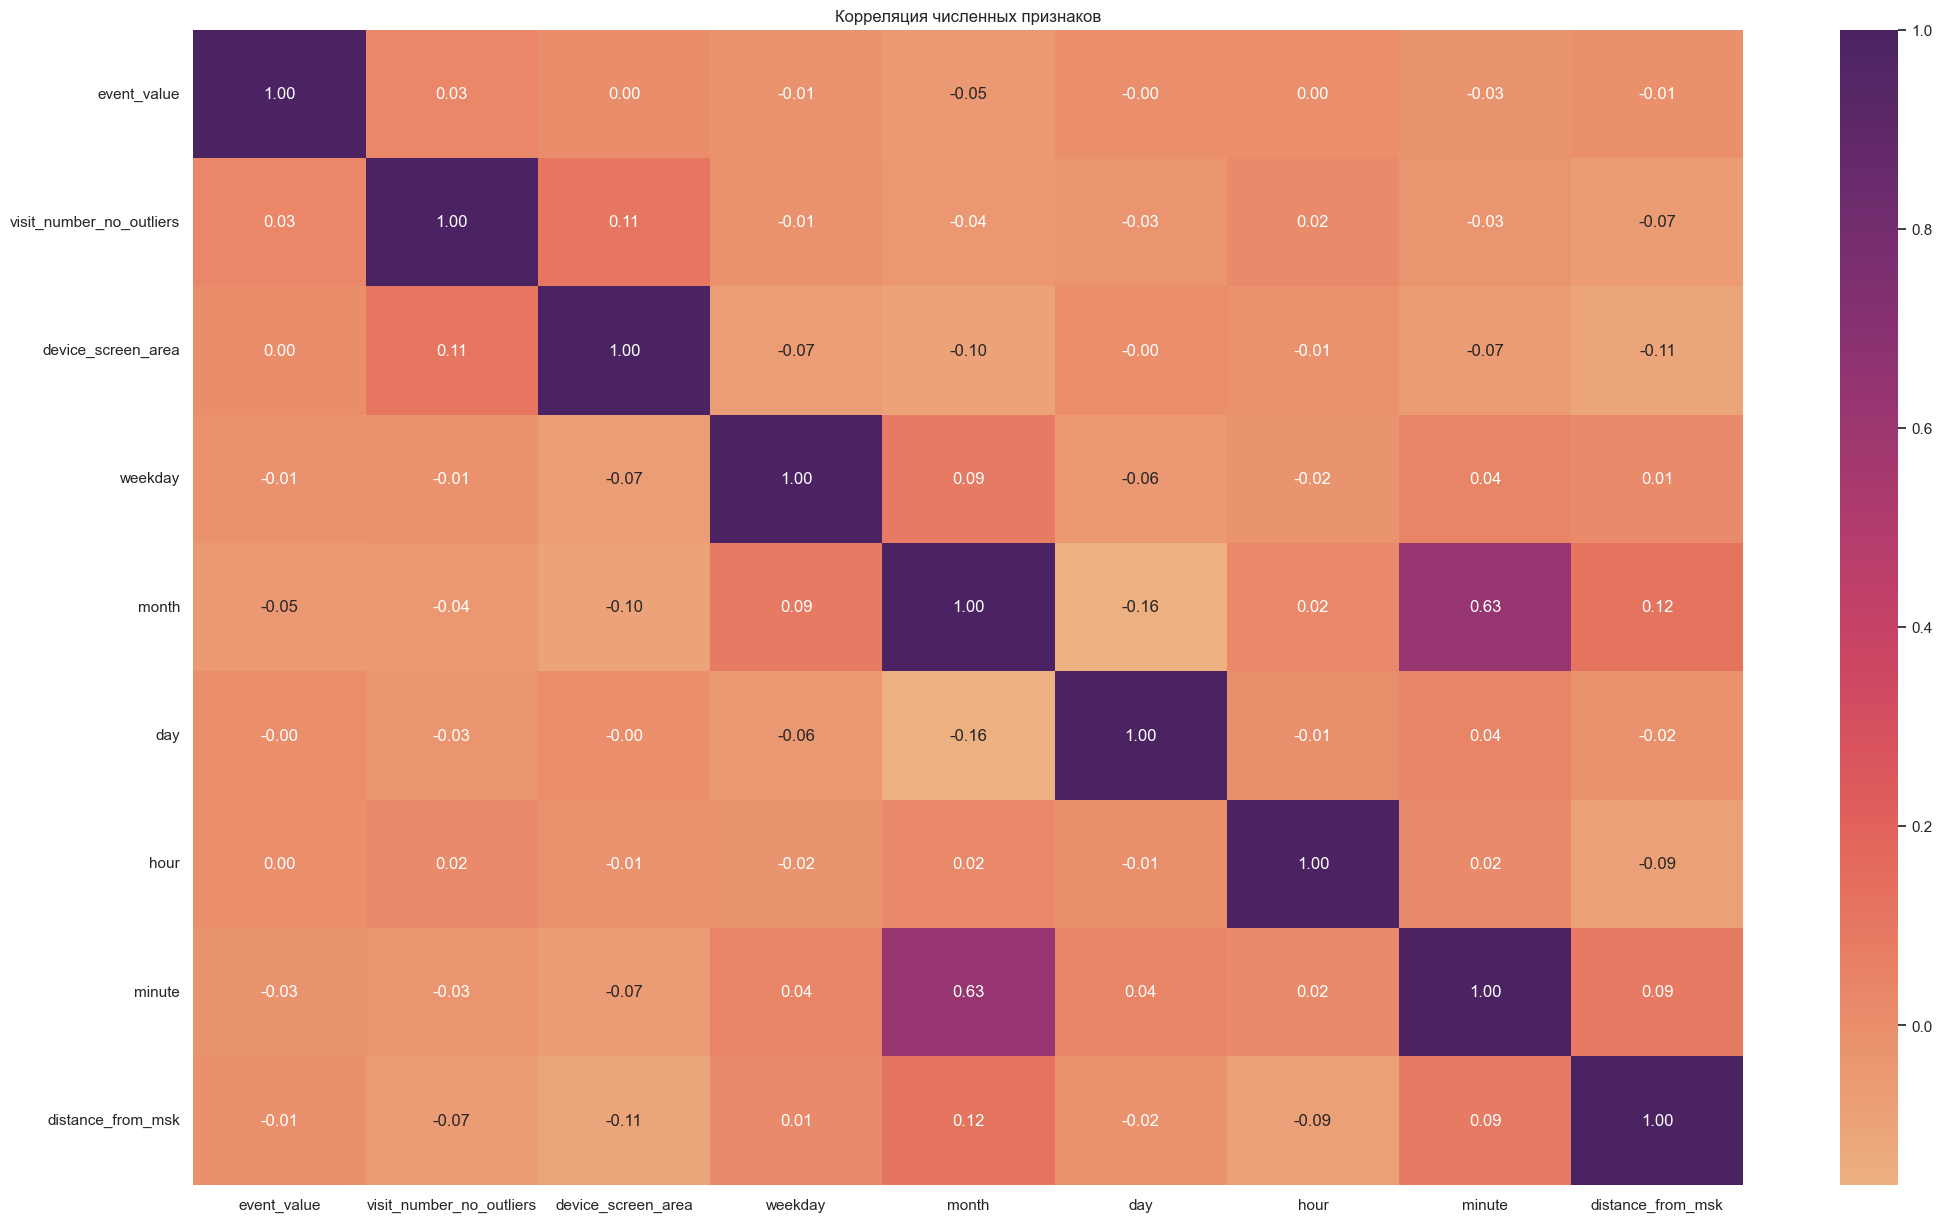

In [258]:
numerical = ['event_value', 'visit_number_no_outliers', 'device_screen_area', 'weekday', 'month', 'day', 'hour', 'minute','distance_from_msk']
plt.figure(figsize=(25,15))
sns.heatmap(df_full[numerical].corr(), annot=True, fmt='0.2f', cmap= 'flare')
plt.title('Корреляция численных признаков');

In [197]:
df_full[df_full.minute != 0].month.value_counts()

12    360129
11    259277
10     71977
9      14850
Name: month, dtype: int64

C мая по август включительно(+часть сентября) фиксировался только час запроса

In [257]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732257 entries, 0 to 1732256
Data columns (total 48 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 object        
 2   visit_date                datetime64[ns]
 3   visit_time                object        
 4   visit_number              int64         
 5   utm_source                object        
 6   utm_medium                object        
 7   utm_campaign              object        
 8   utm_adcontent             object        
 9   utm_keyword               object        
 10  device_category           object        
 11  device_os                 object        
 12  device_brand              object        
 13  device_model              object        
 14  device_screen_resolution  object        
 15  device_browser            object        
 16  geo_country               object        
 17  geo_city